# Credit EDA Case Study - Application Data

# <a id='3'>1. Setting Up Environment</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import sys
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib.colors import ListedColormap
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#To convert scientific noations such as 1.5643639e+11 to 1564363967221.00
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})
#To display all the columns
pd.set_option('display.max_columns', 500)

# <a id='3'>2. Loading the 'Application Data' CSV File</a>

In [2]:
# Reading the File from same folder where the Python file is available
original_appl_data = pd.read_csv('application_data.csv')

In [3]:
#Top 2 rows of the dataframe
original_appl_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  AMT_ANNUITY  \
0               Y             0       202500.0000  406597.5000   24700.5000   
1               N             0       270000.0000 1293502.5000   35698.5000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      351000.0000   Unaccompanied          Working   
1     1129500.0000          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                      0.0188       -9461           -637         -3648.0000   
1                      0.0035      -16765          -1188         -1186.0000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          nan           1               1                0   
1             -291          nan           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers           1.0000   
1                 1           1           0      Core staff           2.0000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0        0.0830        0.2629        0.1394          0.0247            0.0369   
1        0.3113        0.6222           nan          0.0959            0.0529   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0         0.0000         0.0690         0.0833         0.1250        0.0369   
1         0.0800         0.0345         0.2917         0.3333        0.0130   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   

   LANDAREA_MOD

In [4]:
#Last 2 rows of the dataframe
original_appl_data.tail(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307509               Y             0       171000.0000 370107.0000   
307510               N             0       157500.0000 675000.0000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307509   20205.0000      319500.0000   Unaccompanied  Commercial associate   
307510   49117.5000      675000.0000   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307509                      0.0053      -11961          -4786   
307510                      0.0462      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307509         -2562.0000             -931          nan           1   
307510         -5128.0000             -410          nan           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307509           0        Laborers           2.0000                     2   
307510           0        Laborers           2.0000                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307509                        9                           0   
307510                       20                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
307509                           0                            0   
307510                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
307509                       1                       1   
307510                       0                       1   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
307509                        0  Business Entity Type 1           nan   
307510                        1  Business Entity Type 3        0.7345   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
307509        0.5142        0.6610          0.0124               nan   
307510        0.7086        0.1139          0.0742            0.0526   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
307509                       0.9771              nan             nan   
307510                       0.9881              nan          0.0176   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
307509            nan         0.0690         0.0417            nan   
307510         0.0800         0.0690         0.3750            nan   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
307509           nan                   nan          0.0061   
307510           nan                   nan          0.0791   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
307509                      nan                nan           0.0126   
307510                      nan             0.0000           0.0756   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
307509                nan                        0.9772               nan   
307510             0.0546                        0.98

# <a id='3'>3. Checking the structure of the data</a>

## <a id='5-2'>3.1 Shape of the data set</a>

In [5]:
#Shape of the dataframe
print("Size of application data:","\nNo. of Columns:",original_appl_data.shape[1],
      "\nNo. of Rows:",original_appl_data.shape[0])

Size of application data: 
No. of Columns: 122 
No. of Rows: 307511


## <a id='5-2'>3.2 Information of the data set</a>

In [6]:
#Information on columns of the dataframe like Column names, their data types etc.
original_appl_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [7]:
original_appl_data.describe()

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT  \
count 307511.0000 307511.0000   307511.0000       307511.0000  307511.0000   
mean  278180.5186      0.0807        0.4171       168797.9193  599025.9997   
std   102790.1753      0.2724        0.7221       237123.1463  402490.7770   
min   100002.0000      0.0000        0.0000        25650.0000   45000.0000   
25%   189145.5000      0.0000        0.0000       112500.0000  270000.0000   
50%   278202.0000      0.0000        0.0000       147150.0000  513531.0000   
75%   367142.5000      0.0000        1.0000       202500.0000  808650.0000   
max   456255.0000      1.0000       19.0000    117000000.0000 4050000.0000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count  307499.0000      307233.0000                 307511.0000 307511.0000   
mean    27108.5739      538396.2074                      0.0209 -16036.9951   
std     14493.7373      369446.4605                      0.0138   4363.9886   
min      1615.5000       40500.0000                      0.0003 -25229.0000   
25%     16524.0000      238500.0000                      0.0100 -19682.0000   
50%     24903.0000      450000.0000                      0.0188 -15750.0000   
75%     34596.0000      679500.0000                      0.0287 -12413.0000   
max    258025.5000     4050000.0000                      0.0725  -7489.0000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count    307511.0000        307511.0000      307511.0000  104582.0000   
mean      63815.0459         -4986.1203       -2994.2024      12.0611   
std      141275.7665          3522.8863        1509.4504      11.9448   
min      -17912.0000        -24672.0000       -7197.0000       0.0000   
25%       -2760.0000         -7479.5000       -4299.0000       5.0000   
50%       -1213.0000         -4504.0000       -3254.0000       9.0000   
75%        -289.0000         -2010.0000       -1720.0000      15.0000   
max      365243.0000             0.0000           0.0000      91.0000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count 307511.0000     307511.0000      307511.0000       307511.0000   
mean       1.0000          0.8199           0.1994            0.9981   
std        0.0018          0.3843           0.3995            0.0432   
min        0.0000          0.0000           0.0000            0.0000   
25%        1.0000          1.0000           0.0000            1.0000   
50%        1.0000          1.0000           0.0000            1.0000   
75%        1.0000          1.0000           0.0000            1.0000   
max        1.0000          1.0000           1.0000            1.0000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count 307511.0000 307511.0000      307509.0000           307511.0000   
mean       0.2811      0.0567           2.1527                2.0525   
std        0.4495      0.2313           0.9107                0.5090   
min        0.0000      0.0000           1.0000                1.0000   
25%        0.0000      0.0000           2.0000                2.0000   
50%        0.0000      0.0000           2.0000                2.0000   
75%        1.0000      0.0000           3.0000                2.0000   
max        1.0000      1.0000          20.0000                3.0000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                  307511.0000              307511.0000   
mean                        2.0315                  12.0634   
std                         0.5027                   3.2658   
min                         1.0000                   0.0000   
25%                         2.0000                  10.0000   
50%                         2.0000                  12.0000   
75%                         2.0000                  14.0000   
max                         3.0000                  23.0000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
cou

## <a id='5-2'>3.3 Column Names</a>

In [8]:
#List of columns names
original_appl_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## <a id='5-2'>3.4 Count of Numerical and Categorical columns</a>

In [9]:
numeric_columns = original_appl_data.select_dtypes(include = [np.number])
categorical_columns = original_appl_data.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

There are 106 numerical and 16 categorical variables in the data set


# <a id='3'>4. Data Quality Check</a>

## <a id='5-2'>4.1 Checking missing values percentages column wise</a>

In [10]:
missing_count = ((original_appl_data.isnull().sum())/len(original_appl_data))*100
missing_count = round(missing_count[missing_count > 0],2)
print(missing_count.sort_values(ascending=False))

COMMONAREA_MEDI                69.8700
COMMONAREA_AVG                 69.8700
COMMONAREA_MODE                69.8700
NONLIVINGAPARTMENTS_AVG        69.4300
NONLIVINGAPARTMENTS_MODE       69.4300
NONLIVINGAPARTMENTS_MEDI       69.4300
FONDKAPREMONT_MODE             68.3900
LIVINGAPARTMENTS_AVG           68.3500
LIVINGAPARTMENTS_MEDI          68.3500
LIVINGAPARTMENTS_MODE          68.3500
FLOORSMIN_AVG                  67.8500
FLOORSMIN_MEDI                 67.8500
FLOORSMIN_MODE                 67.8500
YEARS_BUILD_AVG                66.5000
YEARS_BUILD_MEDI               66.5000
YEARS_BUILD_MODE               66.5000
OWN_CAR_AGE                    65.9900
LANDAREA_AVG                   59.3800
LANDAREA_MEDI                  59.3800
LANDAREA_MODE                  59.3800
BASEMENTAREA_MODE              58.5200
BASEMENTAREA_AVG               58.5200
BASEMENTAREA_MEDI              58.5200
EXT_SOURCE_1                   56.3800
NONLIVINGAREA_AVG              55.1800
NONLIVINGAREA_MODE       

## <a id='5-2'>4.2 How to deal with missing values</a>

**Variable: CNT_FAM_MEMBERS**

In [11]:
print('Count of blank values in CNT_FAM_MEMBERS is:', original_appl_data['CNT_FAM_MEMBERS'].isnull().sum())
print('Mean of column Count of Family Members is:', original_appl_data['CNT_FAM_MEMBERS'].mean())
print('Median of column Count of Family Members is:', original_appl_data['CNT_FAM_MEMBERS'].median())
print('Mode of column Count of Family Members is:', original_appl_data['CNT_FAM_MEMBERS'].mode())

Count of blank values in CNT_FAM_MEMBERS is: 2
Mean of column Count of Family Members is: 2.152665450442101
Median of column Count of Family Members is: 2.0
Mode of column Count of Family Members is: 0   2.0000
dtype: float64


**Here there are only 2 blank values in variable: CNT_FAM_MEMBERS and count of family members cannot have fractions or decimals, so we can fill the two blank values with Median**

In [12]:
# replacing NA values in CNT_FAM_MEMBERS with 2 
original_appl_data['CNT_FAM_MEMBERS'] = original_appl_data['CNT_FAM_MEMBERS'].fillna(2)

**Variable: AMT_ANNUITY**

In [13]:
print('Count of blank values in AMT_ANNUITY is:', original_appl_data['AMT_ANNUITY'].isnull().sum())
print('Mean of column AMT_ANNUITY is:', original_appl_data['AMT_ANNUITY'].mean())
print('Median of column AMT_ANNUITY is:', original_appl_data['AMT_ANNUITY'].median())
print('Standard deviation of column AMT_ANNUITY is:', original_appl_data['AMT_ANNUITY'].std())

Count of blank values in AMT_ANNUITY is: 12
Mean of column AMT_ANNUITY is: 27108.573909183444
Median of column AMT_ANNUITY is: 24903.0
Standard deviation of column AMT_ANNUITY is: 14493.737315117392


**As standard deviation is quite high, we can use Median value for imputation.**

**Variable: AMT_GOODS_PRICE**

In [14]:
print('Count of blank values in AMT_GOODS_PRICE is:', original_appl_data['AMT_GOODS_PRICE'].isnull().sum())
print('Mean of column AMT_GOODS_PRICE is:', original_appl_data['AMT_GOODS_PRICE'].mean())
print('Median of column AMT_GOODS_PRICE is:', original_appl_data['AMT_GOODS_PRICE'].median())
print('Standard deviation of column AMT_GOODS_PRICE is:', original_appl_data['AMT_GOODS_PRICE'].std())

Count of blank values in AMT_GOODS_PRICE is: 278
Mean of column AMT_GOODS_PRICE is: 538396.2074288895
Median of column AMT_GOODS_PRICE is: 450000.0
Standard deviation of column AMT_GOODS_PRICE is: 369446.4605400129


**As standard deviation is quite high, we can use Median value for imputation.**

## <a id='5-2'>4.3 Removing columns where missing values are more than 35%</a>

In [15]:
columns_to_drop = missing_count[missing_count > 35.0].index
revised_appl_data = original_appl_data.drop(columns_to_drop, axis=1)
print("\nShape of Original file:",original_appl_data.shape,"\nShape of Revised file:",revised_appl_data.shape)
print("No. of Columns dropped:", original_appl_data.shape[1] - revised_appl_data.shape[1])


Shape of Original file: (307511, 122) 
Shape of Revised file: (307511, 73)
No. of Columns dropped: 49


## <a id='5-2'>4.4 Count of Numerical and Categorical columns</a>

In [16]:
numeric_columns = revised_appl_data.select_dtypes(include = [np.number])
categorical_columns = revised_appl_data.select_dtypes(exclude = [np.number])
print('In the revised data set, there are {0} numerical and {1} categorical variables in the data set'.\
     format(numeric_columns.shape[1], categorical_columns.shape[1]))

In the revised data set, there are 61 numerical and 12 categorical variables in the data set


## <a id='5-2'>4.5 Datatype of column: CNT_FAM_MEMBERS</a>

In [17]:
revised_appl_data['CNT_FAM_MEMBERS'].dtypes

dtype('float64')

**Here the data type of 'CNT_FAM_MEMBERS' is "Float64" which is incorrect as Count of Family Members can never be float. So, we convert the datatype to "int64".**

In [18]:
revised_appl_data['CNT_FAM_MEMBERS'] = revised_appl_data['CNT_FAM_MEMBERS'].astype('int64')
revised_appl_data['CNT_FAM_MEMBERS'].dtypes

dtype('int64')

## <a id='5-2'>4.6 Making Amount based columns readable</a>

In [19]:
revised_appl_data['AMT_INCOME_TOTAL'] = revised_appl_data['AMT_INCOME_TOTAL']/1000000
revised_appl_data['AMT_CREDIT'] = revised_appl_data['AMT_CREDIT']/100000

# <a id='5'>5. Derived Metrics</a>

## <a id='5-2'>5.1 Calculating applicant's age based on DAYS_BIRTH</a>

In [20]:
revised_appl_data['APPLICANT_AGE'] = revised_appl_data['DAYS_BIRTH']*-1/365
revised_appl_data['APPLICANT_AGE'] = revised_appl_data['APPLICANT_AGE'].astype('int64')

## <a id='5-2'>5.2 Creating Bins for range of Applicant's Age</a>

In [21]:
bins = [20, 35, 50, 75]
slot = ['Young', 'Middle Age', 'Senior']
revised_appl_data['APPLICANT_AGE_BIN'] = pd.cut(revised_appl_data['APPLICANT_AGE'], bins, labels=slot)

## <a id='5-2'>5.3 Calculating applicant's experience in current organization based on DAYS_EMPLOYED</a>

In [22]:
revised_appl_data['APPLICANT_EXP'] = revised_appl_data['DAYS_EMPLOYED']*-1/365
revised_appl_data['APPLICANT_EXP'] = revised_appl_data['APPLICANT_EXP'].astype('int64')

## <a id='5-2'>5.4 Create Bins for range of Annual Income</a>

In [23]:
income_bins = [25000, 50000, 100000, 150000, 1000000]
income_slot = ['low income', 'medium income', 'high income', 'very high income']
revised_appl_data['AMT_INCOME_TOTAL_BIN'] = pd.cut(original_appl_data['AMT_INCOME_TOTAL'],
                                                   income_bins, labels = income_slot)

# <a id='5'>6. Analysis of Outliers</a>

## <a id='5-1'>6.1 Variable: AMT_INCOME_TOTAL</a>

**In below Scatter Plot (Figure-1), it has been observed that variable: AMT_INCOME_TOTAL has several Outliers. We will use percentile values to identify the outliers and then will drop them**

Text(0.5, 1.0, 'Figure-1: Amount Income Total scatter plot spread with Outliers')

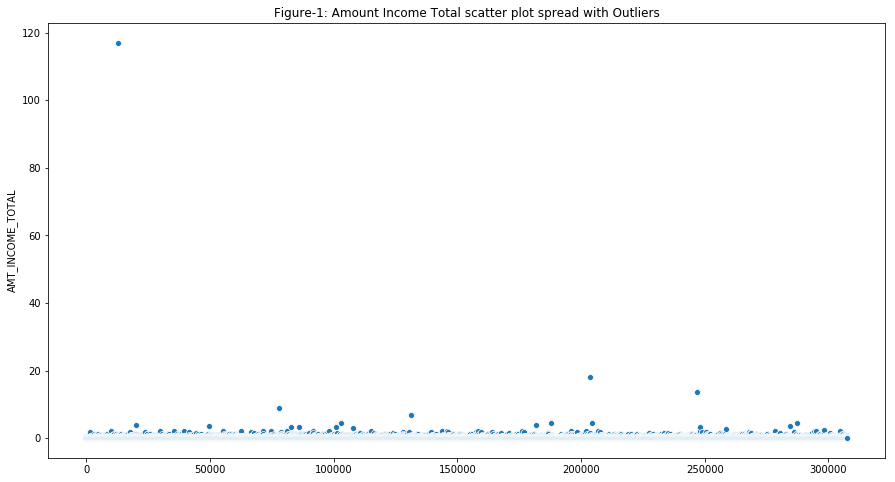

In [24]:
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['AMT_INCOME_TOTAL'].index, y = revised_appl_data['AMT_INCOME_TOTAL'])
plt.title('Figure-1: Amount Income Total scatter plot spread with Outliers')

In [25]:
# Getting the percentile of values available in the dataset to identify the outliers.
annual_income = revised_appl_data['AMT_INCOME_TOTAL'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
annual_income

count   307511.0000
mean         0.1688
std          0.2371
min          0.0256
25%          0.1125
50%          0.1472
75%          0.2025
90%          0.2700
95%          0.3375
99%          0.4725
max        117.0000
Name: AMT_INCOME_TOTAL, dtype: float64

**We can easily see that at 99 percentiles, the value is less than 0.47, however between 99% to Max, there is high jump with the max value of 117. We will drop the values greater than 0.5 to continue with this EDA.**

Text(0.5, 1.0, 'Figure-2: Amount Income Total scatter plot spread after removing Outliers')

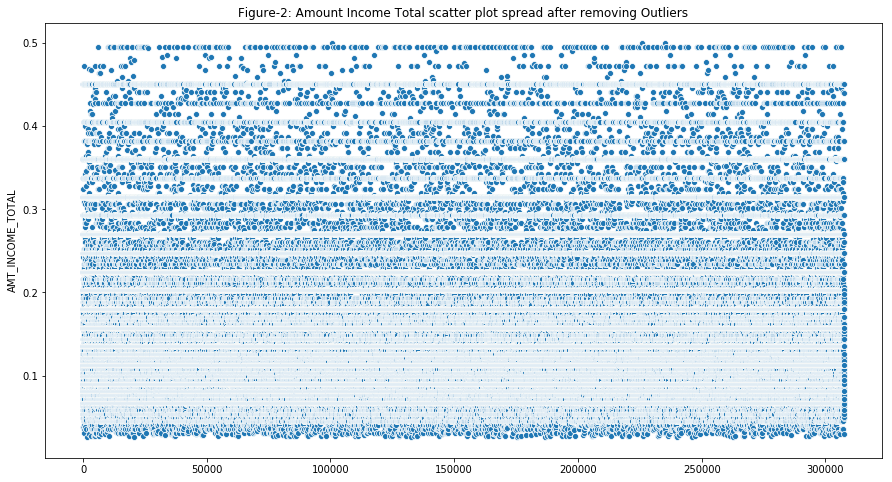

In [26]:
revised_appl_data = revised_appl_data[(revised_appl_data['AMT_INCOME_TOTAL'] < 0.5)]
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['AMT_INCOME_TOTAL'].index, y = revised_appl_data['AMT_INCOME_TOTAL'])
plt.title('Figure-2: Amount Income Total scatter plot spread after removing Outliers')

## <a id='5-1'>6.2 Variable: AMT_GOODS_PRICE</a>

**In below Scatter Plot (Figure-1), it has been observed that variable: AMT_GOODS_PRICE has several Outliers. We will use percentile values to identify the outliers and then will drop them**

Text(0.5, 1.0, 'Figure-1: Amount Goods Price scatter plot spread with Outliers')

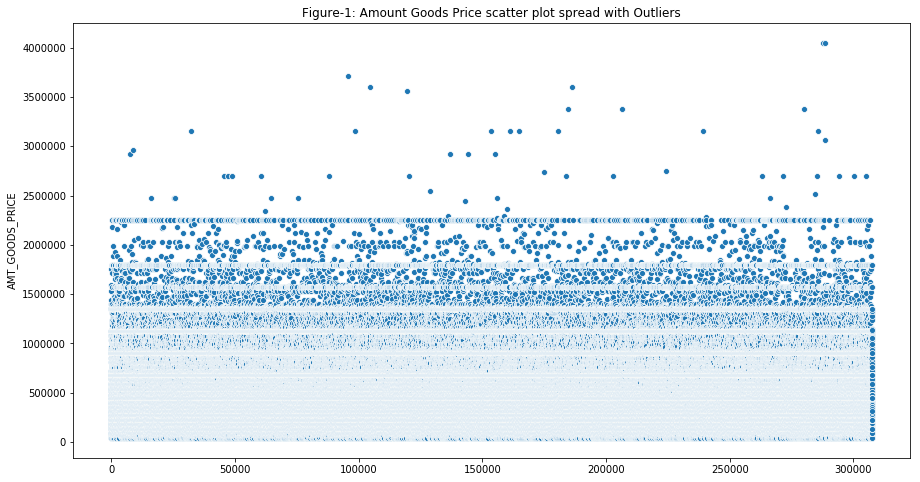

In [27]:
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['AMT_GOODS_PRICE'].index, y = revised_appl_data['AMT_GOODS_PRICE'])
plt.title('Figure-1: Amount Goods Price scatter plot spread with Outliers')

In [28]:
# Getting the percentile of values available in the dataset to identify the outliers.
amt_good_price = revised_appl_data['AMT_GOODS_PRICE'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
amt_good_price

count    304533.0000
mean     533911.8244
std      364133.9078
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
90%     1080000.0000
95%     1273500.0000
99%     1800000.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

**We can easily see that at 99 percentiles, the value is less than 1.8M, however between 99% to Max, there is high jump with the max value of 4.05M. We will drop the values greater than 1.35M to continue with this EDA.**

Text(0.5, 1.0, 'Figure-2: Amount Good Price scatter plot spread after removing Outliers')

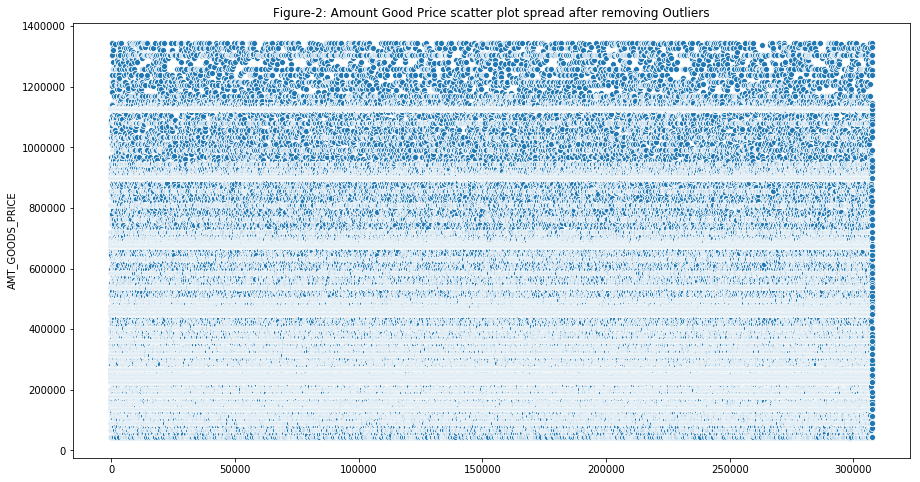

In [30]:
revised_appl_data = revised_appl_data[(revised_appl_data['AMT_GOODS_PRICE'] < 1350000)]
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data.AMT_GOODS_PRICE.index, y = revised_appl_data.AMT_GOODS_PRICE)
plt.title('Figure-2: Amount Good Price scatter plot spread after removing Outliers')

## <a id='5-1'>6.3 Variable: CNT_CHILDREN</a>

**In below Scatter Plot (Figure-1), it has been observed that variable: CNT_CHILDREN has several Outliers. We will use percentile values to identify the outliers and then will drop them**

Text(0.5, 1.0, 'Figure-1: No. of Children scatter plot spread with Outliers')

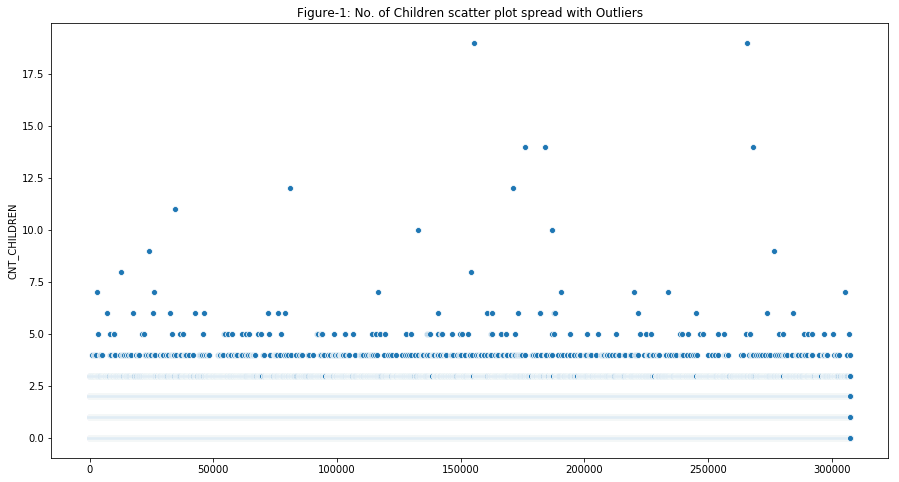

In [31]:
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['CNT_CHILDREN'].index, y = revised_appl_data['CNT_CHILDREN'])
plt.title('Figure-1: No. of Children scatter plot spread with Outliers')

In [32]:
# Getting the percentile of values available in the dataset to identify the outliers.
cnt_children = revised_appl_data['CNT_CHILDREN'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
cnt_children

count   290916.0000
mean         0.4171
std          0.7222
min          0.0000
25%          0.0000
50%          0.0000
75%          1.0000
90%          2.0000
95%          2.0000
99%          3.0000
max         19.0000
Name: CNT_CHILDREN, dtype: float64

**We can easily see that at 99 percentiles, the value is less than 4, however between 99% to Max, there is high jump with the max value of 19. We will drop the values greater than 6 to continue with this EDA.**

Text(0.5, 1.0, 'Figure-2: No. of Children scatter plot spread after removing Outliers')

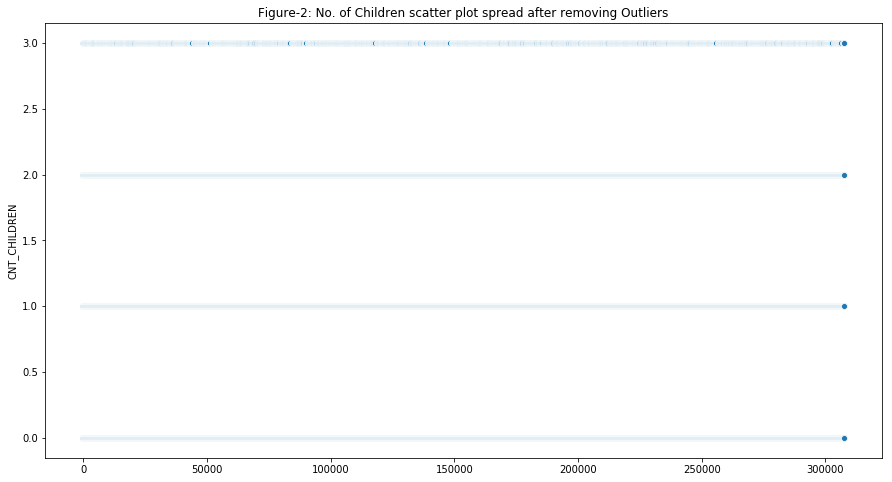

In [33]:
revised_appl_data = revised_appl_data[(revised_appl_data['CNT_CHILDREN'] <= 3)]
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['CNT_CHILDREN'].index, y = revised_appl_data['CNT_CHILDREN'])
plt.title('Figure-2: No. of Children scatter plot spread after removing Outliers')

## <a id='5-1'>6.4 Variable: AMT_ANNUITY</a>

**In below Scatter Plot (Figure-1), it has been observed that variable: AMT_ANNUITY has several Outliers. We will use percentile values to identify the outliers and then will drop them**

Text(0.5, 1.0, 'Figure-1: Amount Annuity Scatter plot spread with Outliers')

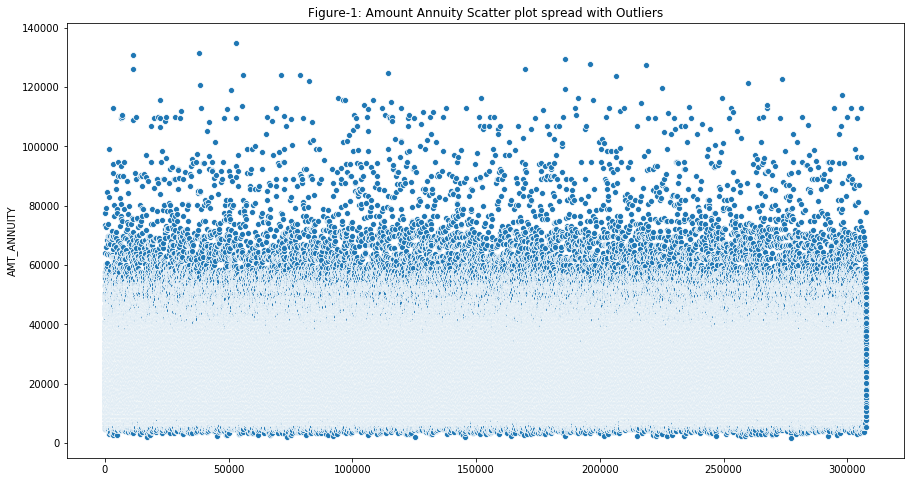

In [34]:
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['AMT_ANNUITY'].index, y = revised_appl_data['AMT_ANNUITY'])
plt.title('Figure-1: Amount Annuity Scatter plot spread with Outliers')

In [35]:
# Getting the percentile of values available in the dataset to identify the outliers.
amt_annuity = revised_appl_data['AMT_ANNUITY'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
amt_annuity

count   290388.0000
mean     25637.1117
std      12720.8194
min       1615.5000
25%      16155.0000
50%      24088.5000
75%      32539.5000
90%      42201.0000
95%      48861.0000
99%      62950.5000
max     134968.5000
Name: AMT_ANNUITY, dtype: float64

**We can easily see that at 99 percentiles, the value is less than 70K, however between 99% to Max, there is high jump with the max value of 225K. We will drop the values greater than 120K to continue with this EDA.**

Text(0.5, 1.0, 'Figure-2: Amount Annuity Scatter plot spread after removing Outliers')

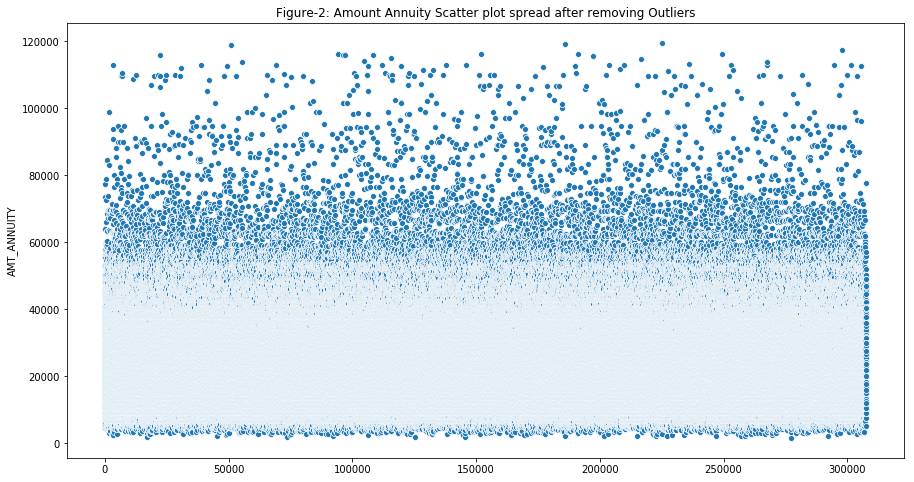

In [36]:
revised_appl_data = revised_appl_data[(revised_appl_data['AMT_ANNUITY'] < 120000)]
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['AMT_ANNUITY'].index, y = revised_appl_data['AMT_ANNUITY'])
plt.title('Figure-2: Amount Annuity Scatter plot spread after removing Outliers')

## <a id='5-1'>6.5 Variable: APPLICANT_EXP</a>

**In below Scatter Plot (Figure-1), it has been observed that variable: APPLICANT_EXP has several Outliers. We will use percentile values to identify the outliers and then will drop them**

Text(0.5, 1.0, 'Figure-1: Applicant Experience in Years scatter plot spread with Outliers')

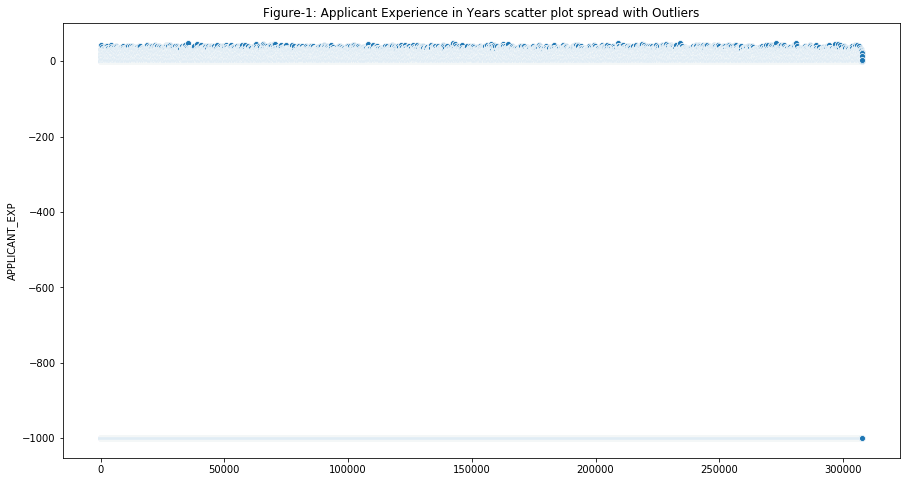

In [37]:
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['APPLICANT_EXP'].index, y = revised_appl_data['APPLICANT_EXP'])
plt.title('Figure-1: Applicant Experience in Years scatter plot spread with Outliers')

In [38]:
# Getting the percentile of values available in the dataset to identify the outliers.
days_employed = revised_appl_data['APPLICANT_EXP'].dropna().describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])
days_employed

count   290371.0000
mean      -177.9338
std        388.8617
min      -1000.0000
25%          0.0000
50%          3.0000
75%          7.0000
90%         13.0000
95%         18.0000
99%         29.0000
max         49.0000
Name: APPLICANT_EXP, dtype: float64

**We can easily see that minimum value of -1000 is our outlier as working experience can not be negative. So, we will drop the negative values to continue with this EDA.**

Text(0.5, 1.0, 'Figure-2: Applicant Experience in Years scatter plot spread after removing Outliers')

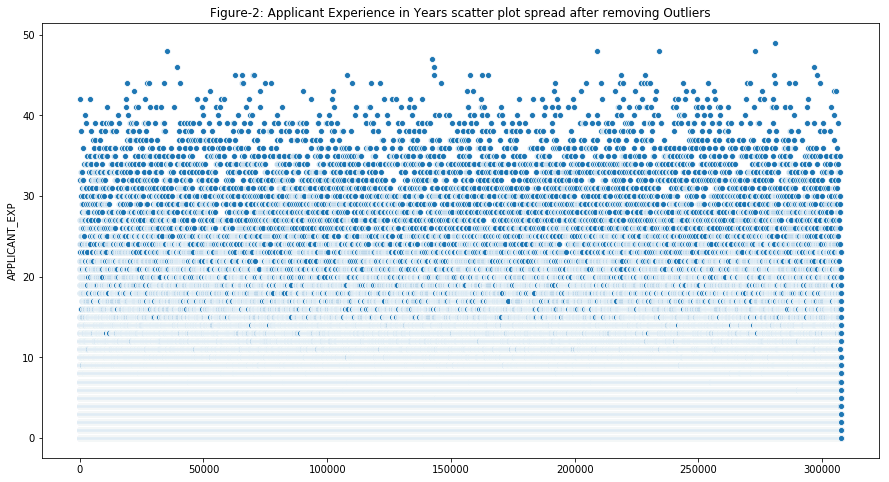

In [39]:
revised_appl_data = revised_appl_data[(revised_appl_data['APPLICANT_EXP'] >= 0)]
fig =  plt.figure(figsize = (15,8))
sns.scatterplot(x = revised_appl_data['APPLICANT_EXP'].index, y = revised_appl_data['APPLICANT_EXP'])
plt.title('Figure-2: Applicant Experience in Years scatter plot spread after removing Outliers')

# <a id='5'>7. Data Analysis</a>

## <a id='5-1'>7.1 Imbalance Check</a>

**Observation: The below graph shows that our dataset is highly skewed and TARGET value: '1' (clients with payment difficulties) is heavily outnumbered by '0' (all other cases) i.e., it's highly imbalanced.**

**The Imbalance percentage of TARGET variable is 8.07 %**

In [40]:
temp_df = revised_appl_data['TARGET'].value_counts()
fig = go.Figure(data=[go.Pie(labels = temp_df.index, values = temp_df.values)])
fig.show()

## <a id='5-1'>7.2 Dividing the Data Set</a>

**Dividing the dataset in two data frames:
a) target_0_df: This data frames contains the records where TARGET = 0
b) target_1_df: This data frames contains the records where TARGET = 1**

In [41]:
target_0_df = revised_appl_data[(revised_appl_data.TARGET != 1)]
target_1_df = revised_appl_data[(revised_appl_data.TARGET != 0)]
#Shape of the dataframe
print("\nSize of target_0_df:","\nNo. of Columns:",target_0_df.shape[1],
      "\nNo. of Rows:",target_0_df.shape[0])
print("\nSize of target_1_df:","\nNo. of Columns:",target_1_df.shape[1],
      "\nNo. of Rows:",target_1_df.shape[0])


Size of target_0_df: 
No. of Columns: 77 
No. of Rows: 216162

Size of target_1_df: 
No. of Columns: 77 
No. of Rows: 21126


In our revised dataset we have 77 columns and for analysis purpose we are selecting below mentioned columns which are most relevant and can have a impact on loan getting default or not.

In [42]:
target_0_df = target_0_df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CNT_CHILDREN',
                           'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH'
                           ,'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
                           'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                           'APPLICANT_AGE', 'APPLICANT_EXP', 'APPLICANT_AGE_BIN', 'AMT_INCOME_TOTAL_BIN']]

target_1_df = target_1_df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CNT_CHILDREN',
                           'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH'
                           ,'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
                           'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                           'APPLICANT_AGE', 'APPLICANT_EXP', 'APPLICANT_AGE_BIN', 'AMT_INCOME_TOTAL_BIN']]

## <a id='5-1'>7.3 Univariate Analysis</a>

**Function: 'Univariate' is defined which will plot the graphs for Categorical and Numerical analysis**

In [43]:
def univariate(col, vartype, df1 = target_0_df, df2 = target_1_df, label_rotation = False):
    '''
    Univariate function will plot the graphs based on below parameters:
     col             : Name of the Column
     vartype         : Variable type : Categorical or Numerical
                         Categorical : 0 (Countplot will be plotted)
                         Continuos   : 1 (Distribution will be plotted)
     df1             : Name of the dataframe (default is target_0_df)
     df2             : Name of the dataframe (default is target_1_df)
     label_rotation  : Default is False 
    '''
    
    temp_df2 = df2[col].value_counts()
    df2 = pd.DataFrame({col: temp_df2.index,'Number of Applications': temp_df2.values})
    
    #Calculate the percentage of target = 1 per various categories
    target_percentage = revised_appl_data[[col, 'TARGET']].groupby([col],as_index=False).mean()
    target_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if vartype == 0:
        fig, ax = plt.subplots(nrows =1,ncols=2,figsize=(24,10))
        sns.set(style="darkgrid")
        
        ax[0].set_title('Count Plot for Target variable = 0', fontsize = 16)
        ax0 = sns.countplot(data = df1, x = col, order = df1[col].value_counts().index, ax = ax[0])
        ax0.set_xlabel(col, fontsize = 14)
        ax0.set_ylabel('Number of Loan Applications', fontsize = 14)
        
        if(label_rotation):
            ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90, fontsize = 14)
        
        total1 = len(df1)
        for p in ax0.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/total1)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax0.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10),
                         textcoords = 'offset points')
            
        ax[1].set_title('Count Plot for Target variable = 1', fontsize = 16)
        ax1 = sns.barplot(ax=ax[1], x = target_percentage[col], y='TARGET', order=target_percentage[col], 
                     data=target_percentage)
        ax1.set_xlabel(col, fontsize = 14)
        ax1.set_ylabel('[%] of target with value 1', fontsize = 14)
        
        if(label_rotation):
            ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize = 14)
               
        
    elif vartype == 1:
        fig, ax = plt.subplots(nrows =1,ncols=2,figsize=(24,10))
        sns.set(style="darkgrid")
        
        ax[0].set_title('Distribution Plot Target variable = 0', fontsize = 16)
        ax0 = sns.distplot(df1[col].dropna(), ax=ax[0])
        ax0.set_xlabel(col)
        ax0.set_ylabel('Number of Loan Applications')
        ax0.axvline(df1[col].mean(), label = "mean", linestyle = "dashed", color = "r")
        
        ax[1].set_title('Distribution Plot Target variable = 1', fontsize = 16)
        ax1 = sns.distplot(df2[col].dropna(), ax=ax[1])
        ax1.set_xlabel(col)
        ax1.set_ylabel('Number of Loan Applications')
        ax1.axvline(df2[col].mean(), label = "mean", linestyle = "dashed", color = "r")
        
    else:
        exit
                
    plt.show()

### <a id='5-1'>7.3.1 Analysis of variable: NAME_CONTRACT_TYPE i.e., Types of loan</a>

**Observations: In Below Plot, we can see that Revolving loans are just a small fraction (10%) of the total number of loans,however, a larger number of Revolving loans, comparing with their frequency, are default.**

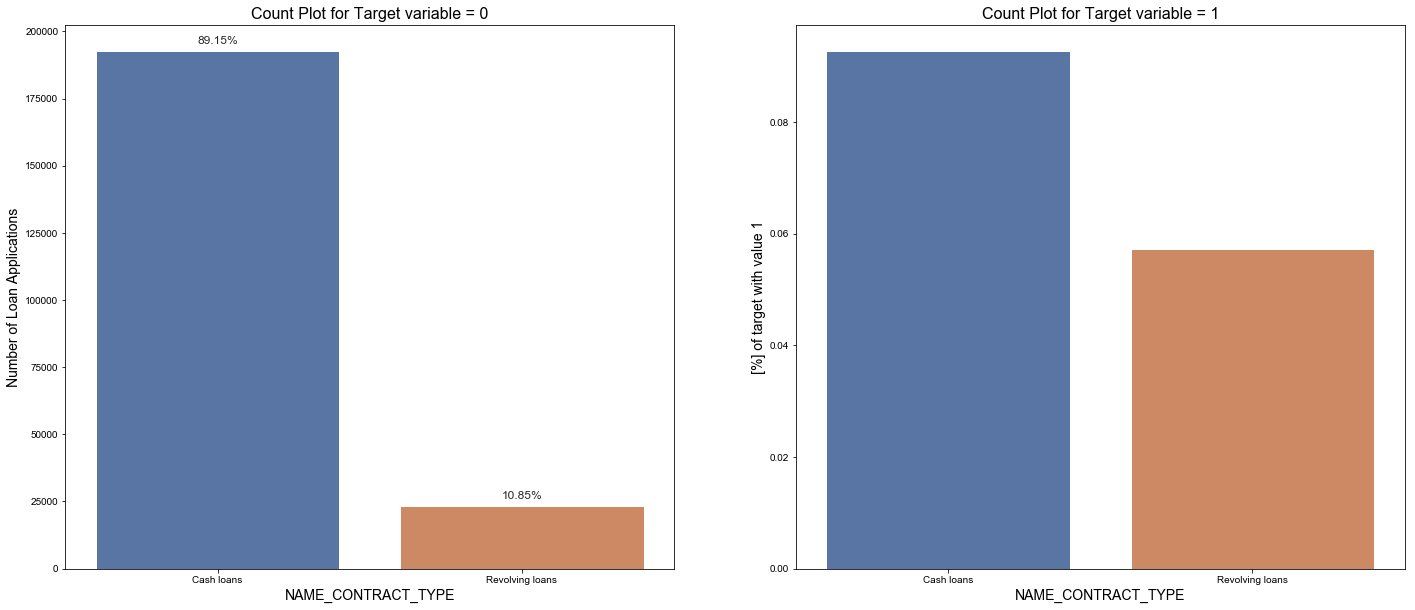

In [44]:
univariate('NAME_CONTRACT_TYPE', 0)

### <a id='5-1'>7.3.2 Analysis of variable: CODE_GENDER</a>

**Observations: The number of Female applicants are more than Male applicants. However, looking to the percent of defaulters, males have a higher chance of not returning their loans, approx 10% as compared to females(~8%).**

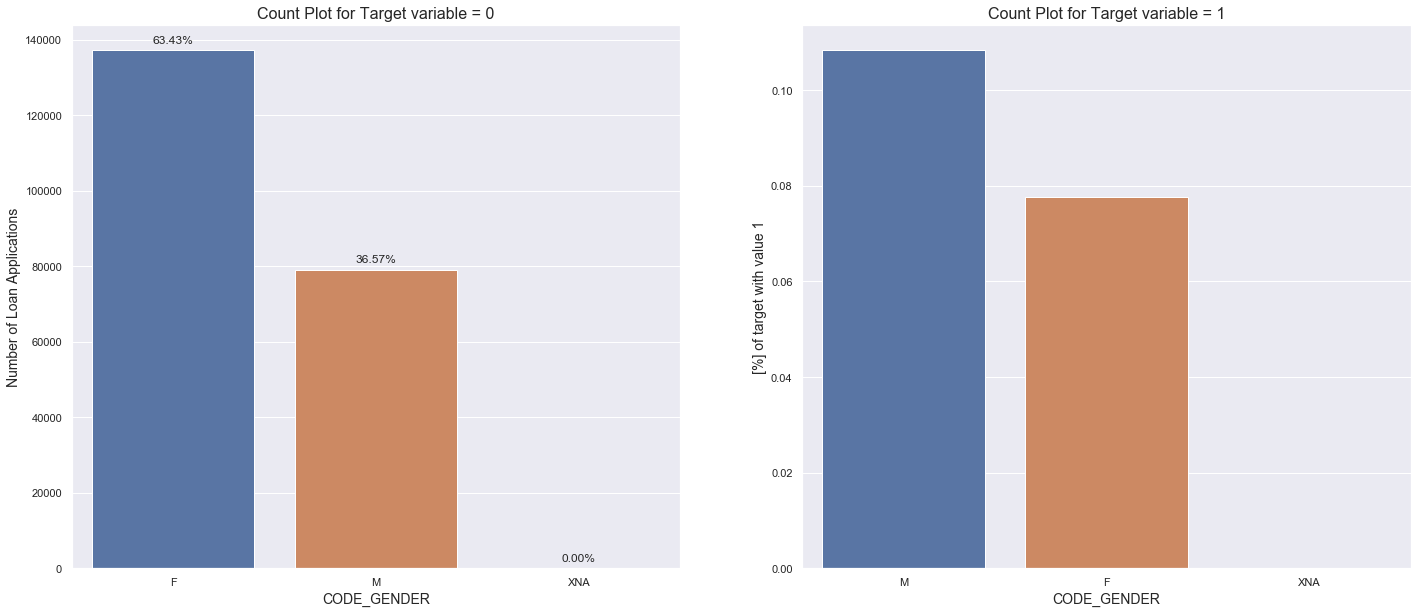

In [45]:
univariate('CODE_GENDER', 0)

### <a id='5-1'>7.3.3 Analysis of variable: FLAG_OWN_CAR</a>

**Observation: The applicants that owns a car are less likely to default as compared to the ones who don't owns a car.**

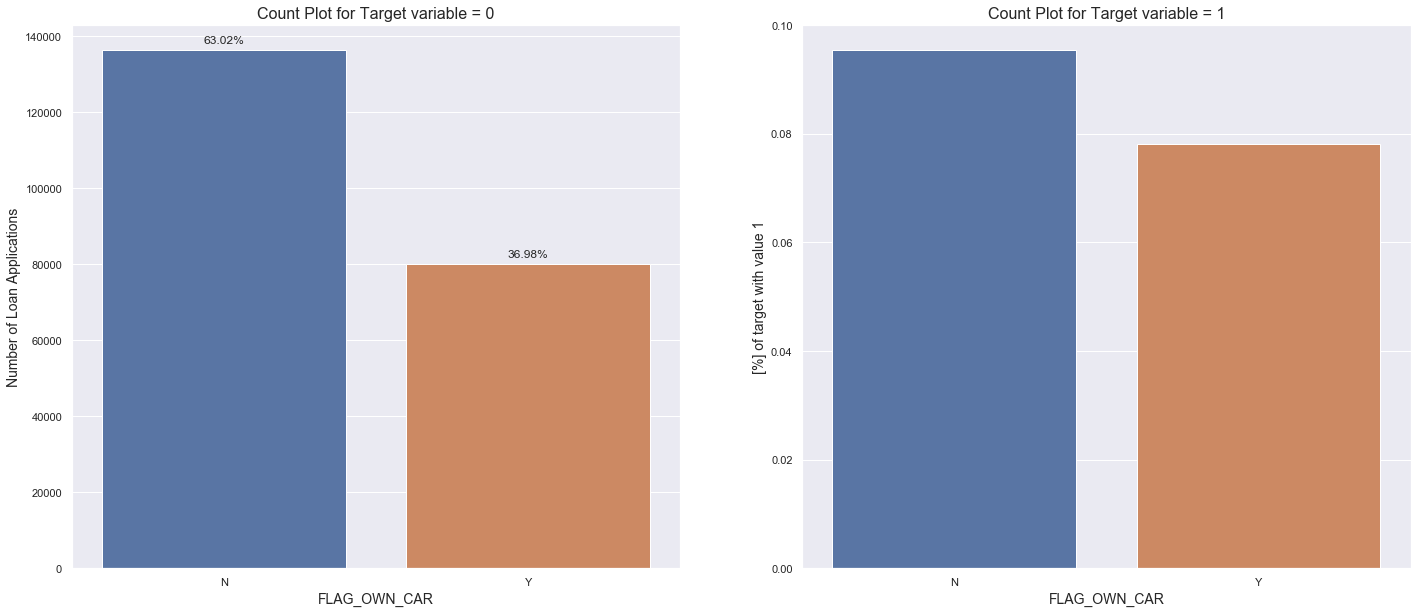

In [46]:
univariate('FLAG_OWN_CAR', 0)

### <a id='5-1'>7.3.4 Analysis of variable: FLAG_OWN_REALTY</a>

**Observations: The applicants that owns a flat/house are more than double of the ones that doesn't own. However, both the categories (owning flat/house or not owning) have same chances of defaulting.**

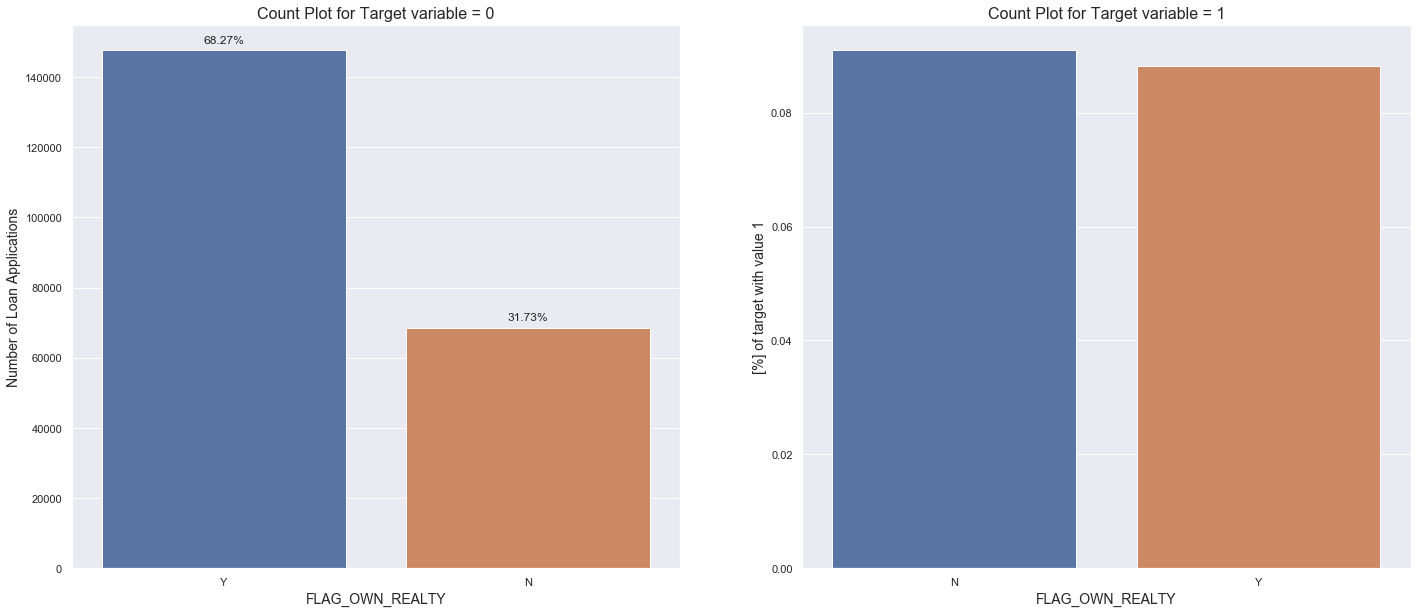

In [47]:
univariate('FLAG_OWN_REALTY', 0)

### <a id='5-1'>7.3.5 Analysis of variable: CNT_CHILDREN</a>

**Observations: Most of the applicants taking a loan have no children and applicants with 3, 4 or more children are much more rare. As for defaulting, applicants with 3 children are slightly more likely to default as compared to applicants with 1, 2, and 0 children.**

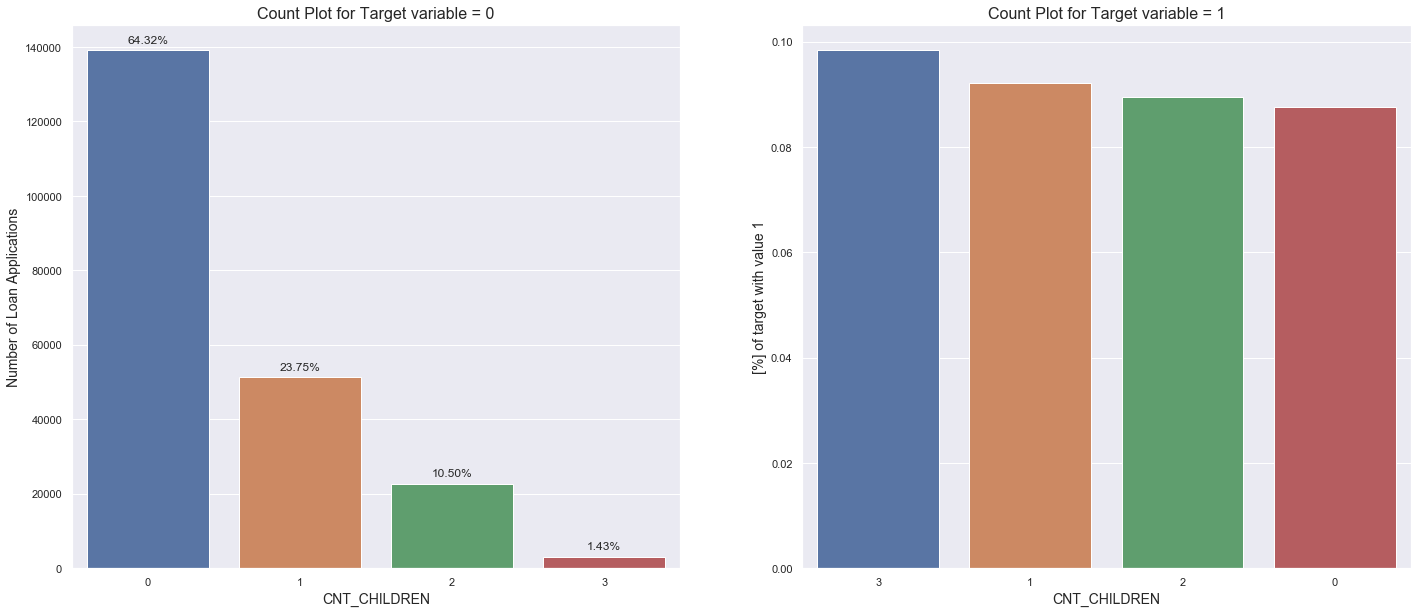

In [48]:
univariate('CNT_CHILDREN', vartype = 0)

### <a id='5-1'>7.3.6 Analysis of variable: NAME_FAMILY_STATUS i.e., Family Status of Applicant who applied for loan</a>

**Observations: Most of the applicants are married, followed by 'Single/not married' and 'Civil marriage'. However, in terms of percentage of defaulting, 'Single/not married' and 'Civil marriage' has the highest percent of defaulting with Widow the lowest.**

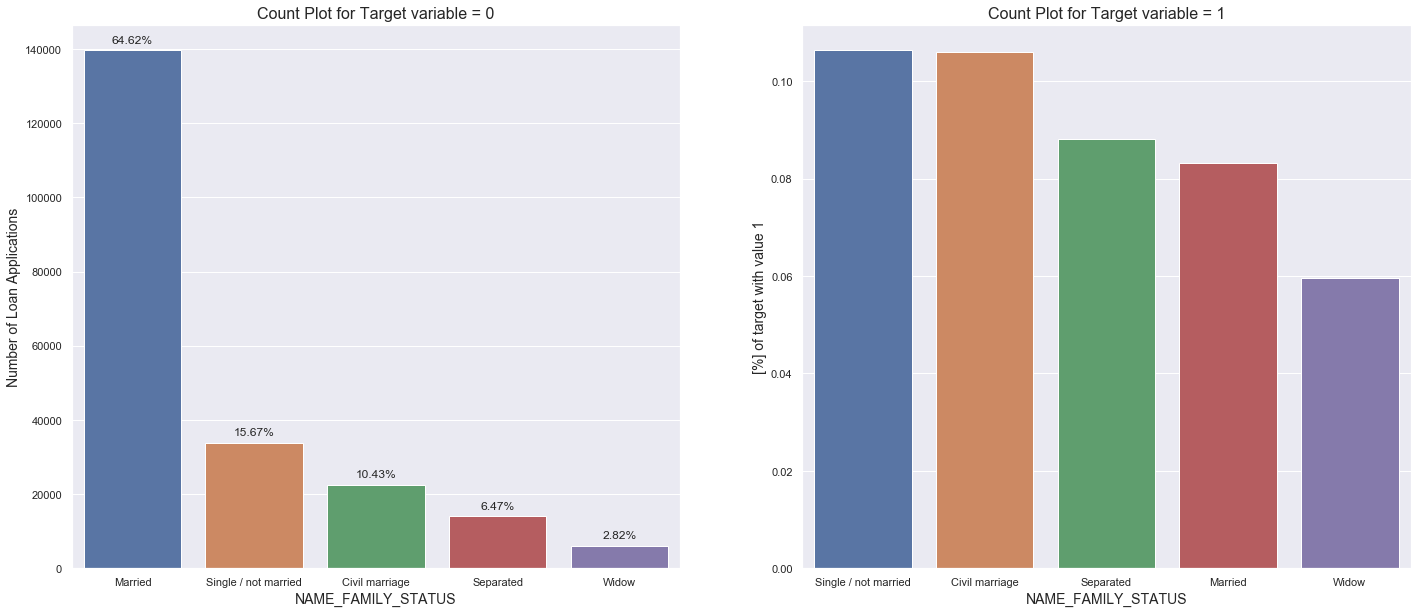

In [49]:
univariate('NAME_FAMILY_STATUS', 0)

### <a id='5-1'>7.3.7 Analysis of variable: NAME_INCOME_TYPE i.e., Income sources of the Applicant who applied for loan</a>

**Observations: Most of applicants for loans are from 'Working', followed by 'Commercial associate' and 'State servant'.
However, the applicants with the type of income Maternity leave have highest ratio of defaulting.**

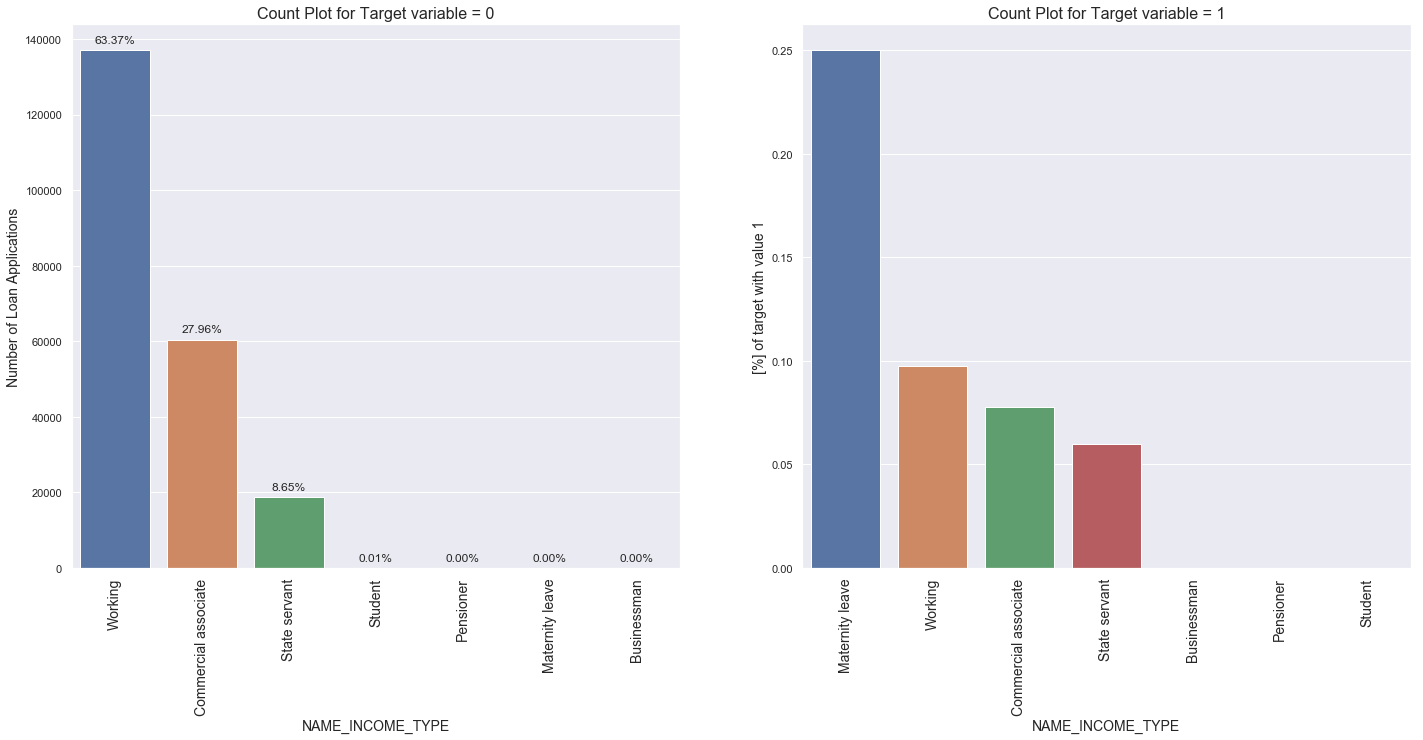

In [50]:
univariate('NAME_INCOME_TYPE', 0, label_rotation = 'true')

### <a id='5-1'>7.3.8 Analysis of variable: NAME_EDUCATION_TYPE i.e., Education of the Applicant who applied for loan</a>

**Observations: Majority of the applicants have 'Secondary/secondary special' education, followed by applicants with 'Higher' education. Only a very small number have an 'academic' degree. However, the 'Lower secondary' category, have the highest rate of defaulting and the people with Academic degree have the lowest rate (less than 2%) of defaulting.**

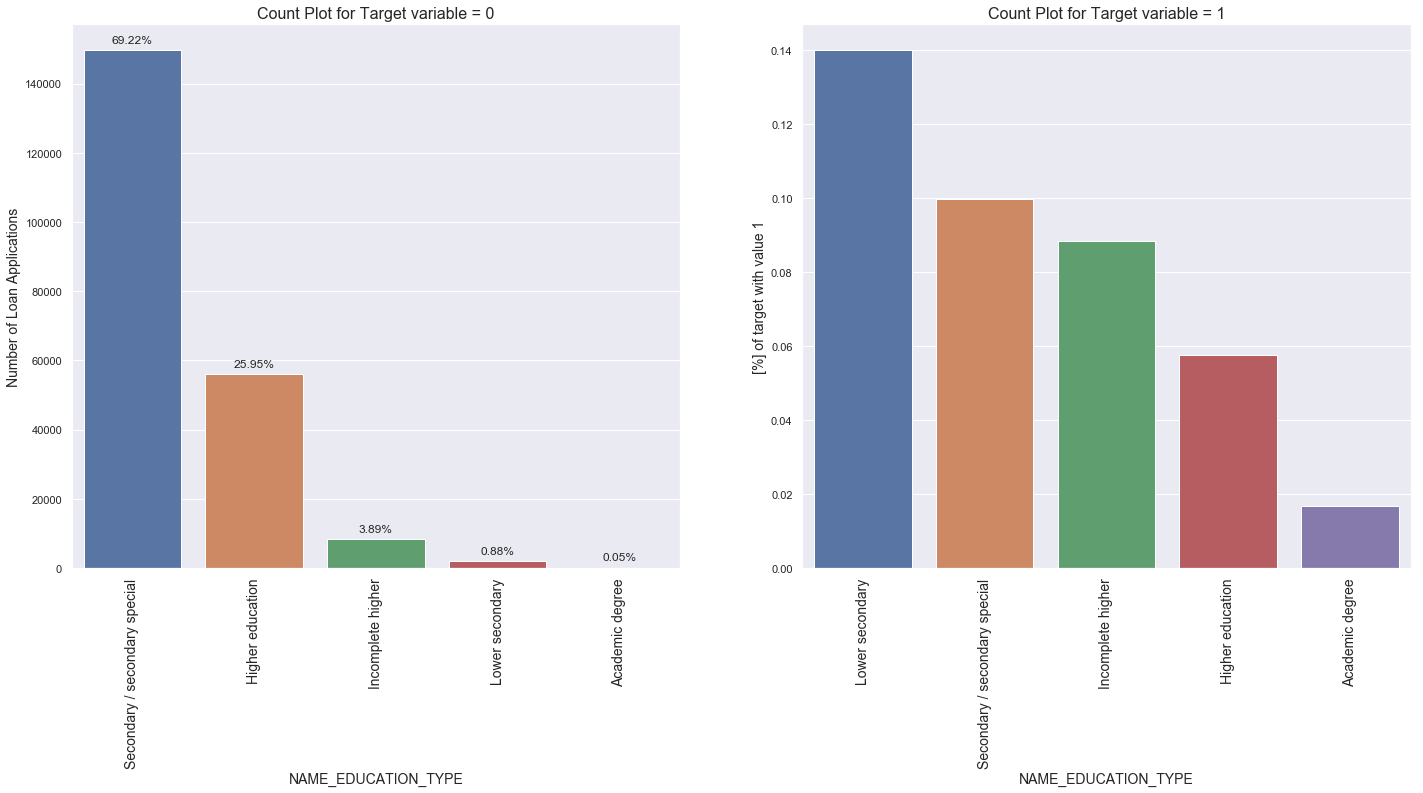

In [51]:
univariate('NAME_EDUCATION_TYPE', 0, label_rotation = 'true')

### <a id='5-1'>7.3.9 Analysis of variable: NAME_HOUSING_TYPE</a>

**Observations: Around 88% applicants have mentioned their housing as 'House/apartment', whereas following categories have a very small number of applicants ('With parents', 'Municipal appartment', 'Rented apartment').
Out of these categories, 'Rented apartment' and 'With parents' have higher changes of defaulting as compared to other categories.**

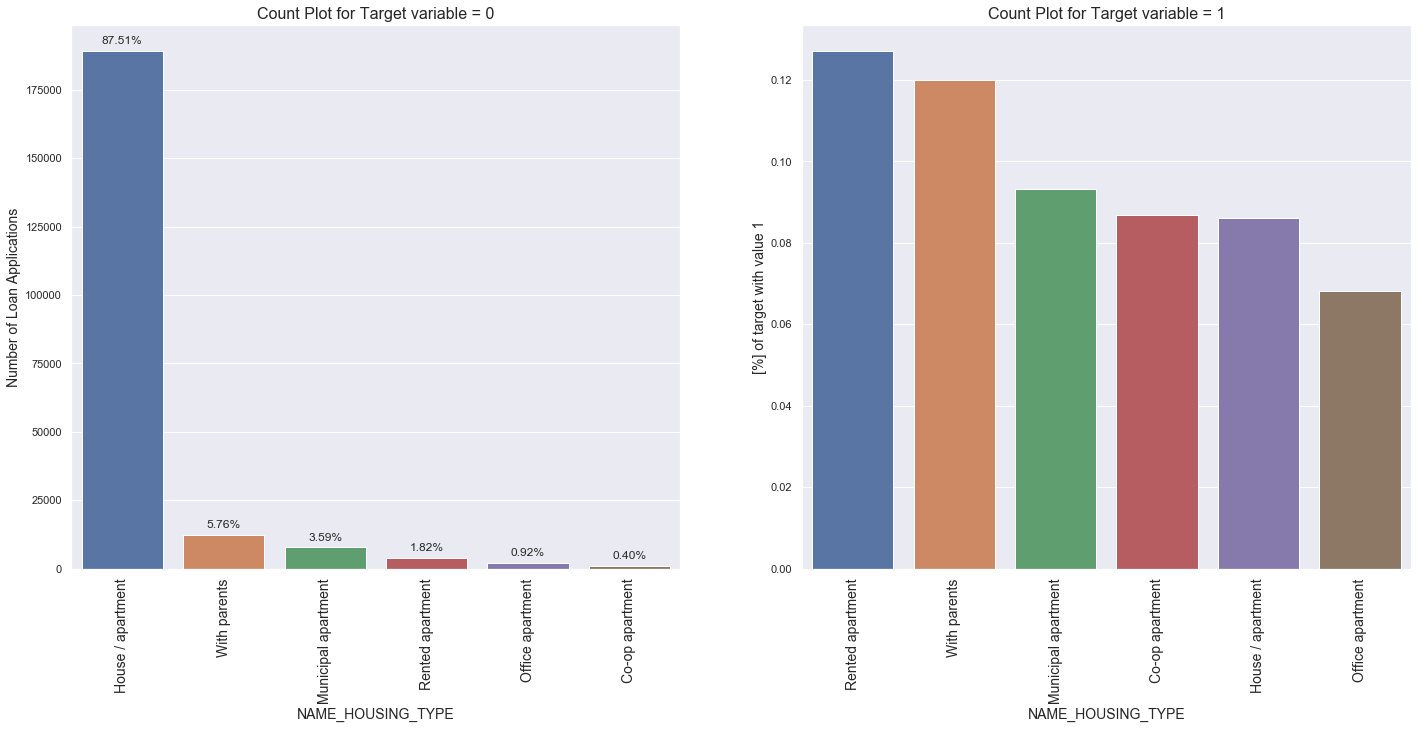

In [52]:
univariate('NAME_HOUSING_TYPE', 0, label_rotation = 'true')

### <a id='5-1'>7.3.10 Analysis of variable: OCCUPATION_TYPE i.e., Occupation of Applicant who applied for loan</a>

**Observations: Most of the loans are taken by 'Laborers', followed by 'Sales staff' and 'Core staff'. 'IT staff' applicants are the least among the available occupation type.
The category with highest chances of defaulting the loans are 'Low-skill Laborers' (above 17%), followed by 'Drivers' and 'Waiters/barmen staff', 'Security staff', 'Laborers' and 'Cooking staff'.**

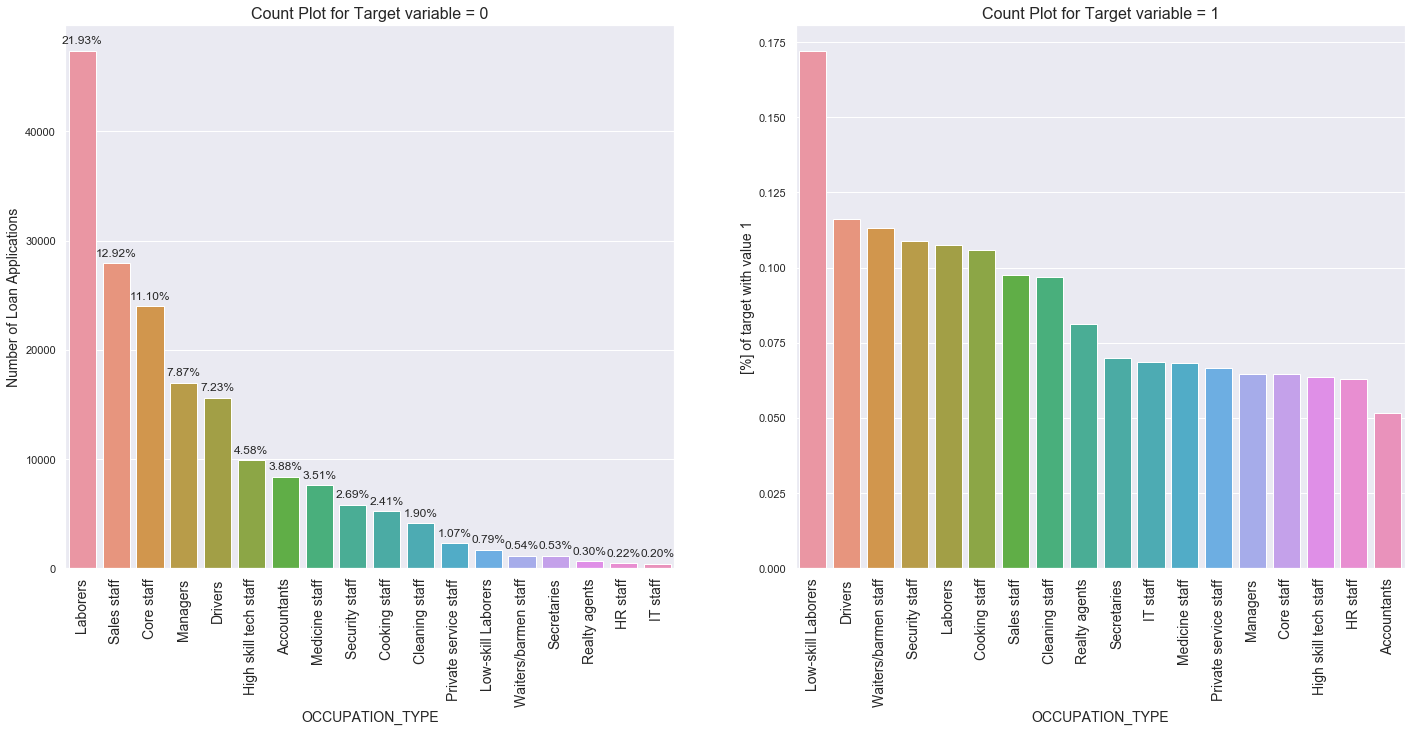

In [53]:
univariate('OCCUPATION_TYPE', 0, label_rotation = 'true')

### <a id='5-1'>7.3.11 Analysis of variable: CNT_FAM_MEMBERS i.e., No. of family members of the Applicant who applied for loan</a>

**Observations: Approx. 50% of applicants have 2 family members, followed by 1 (single persons), 3 (families with one child) and 4. Applicants with family size of 5 and 1 have close to 10% rates of defaulting.**

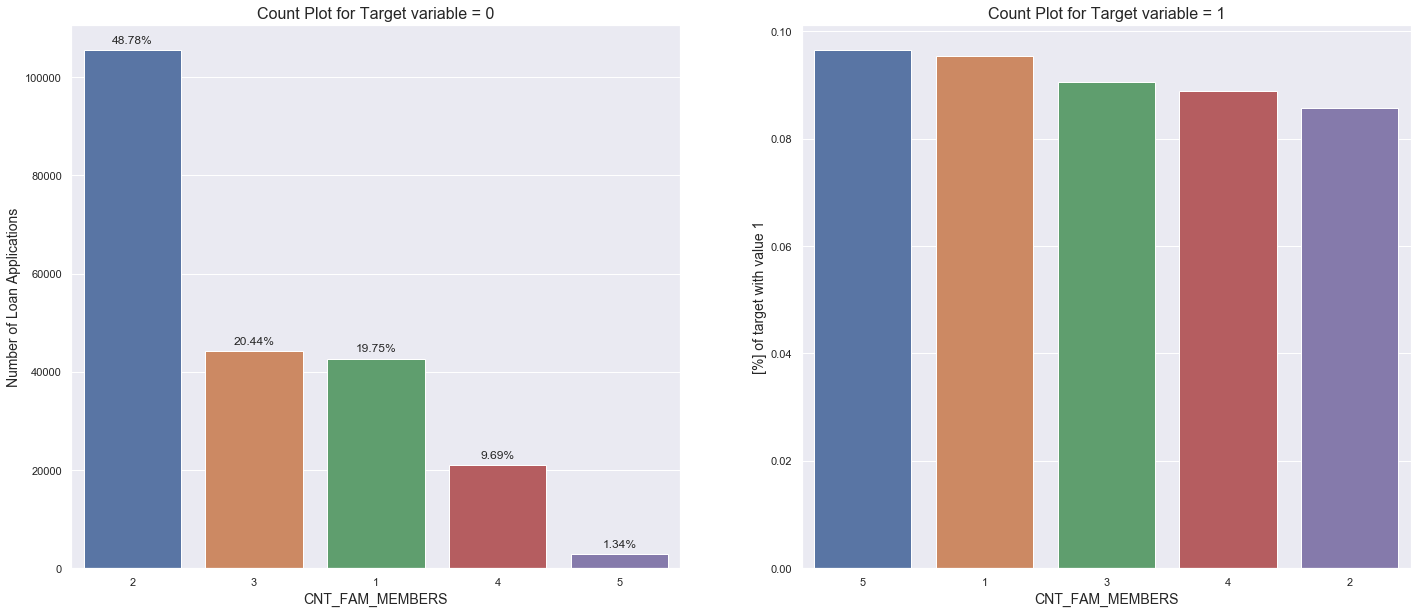

In [54]:
univariate('CNT_FAM_MEMBERS', 0)

### <a id='5-1'>7.3.12 Analysis of variable: APPLICANT_AGE_BIN

**Observations: By looking to this graph, Applicants who are from "Middle Age" are less defaulter than the ones who are in their "Young Age".** 

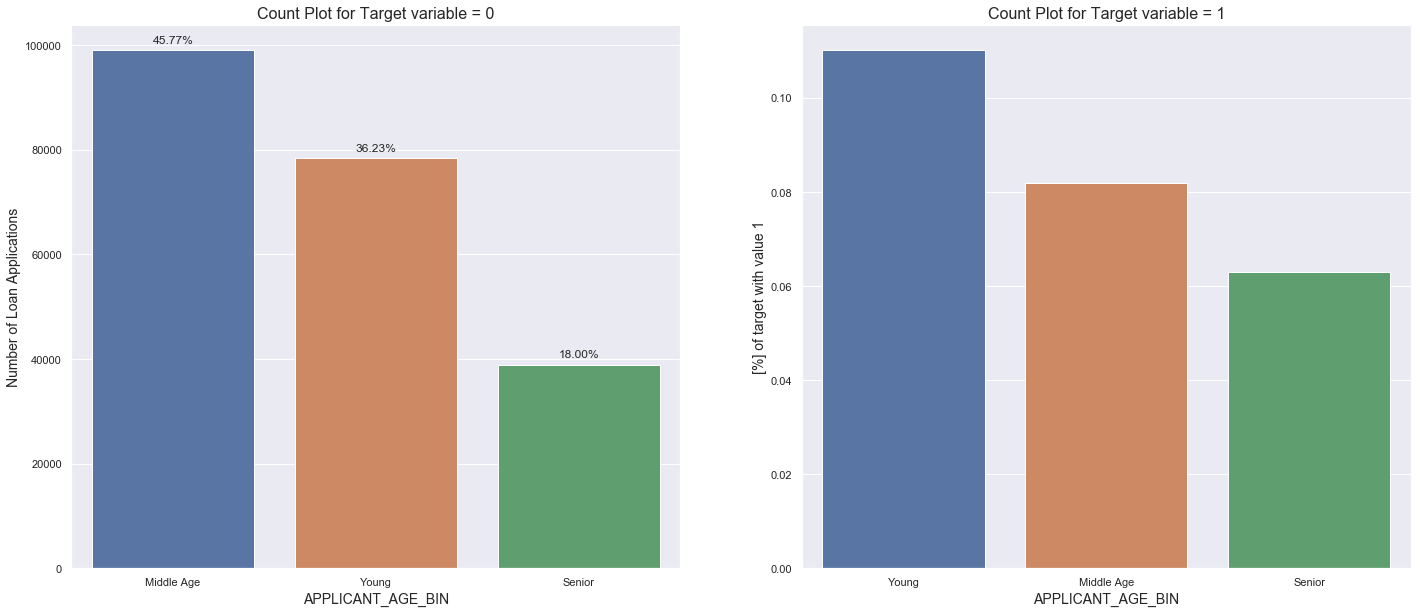

In [55]:
univariate('APPLICANT_AGE_BIN', 0)

### <a id='5-1'>7.3.13 Analysis of variable: AMT_INCOME_TOTAL_BIN

**Observations: In both the groups, Applicants with Very High / High Income are more intend to apply for the Loans, however simarlarly they also tends to be defaulter as well. In this Graph it has been observed that while 53% of applicants with Very High Income and 30% of High Income dont have any issue to repay the loans, however, on the other hand still 49% with Very High Income and 32% with High Income tends to be seeing issues with the repayments.**

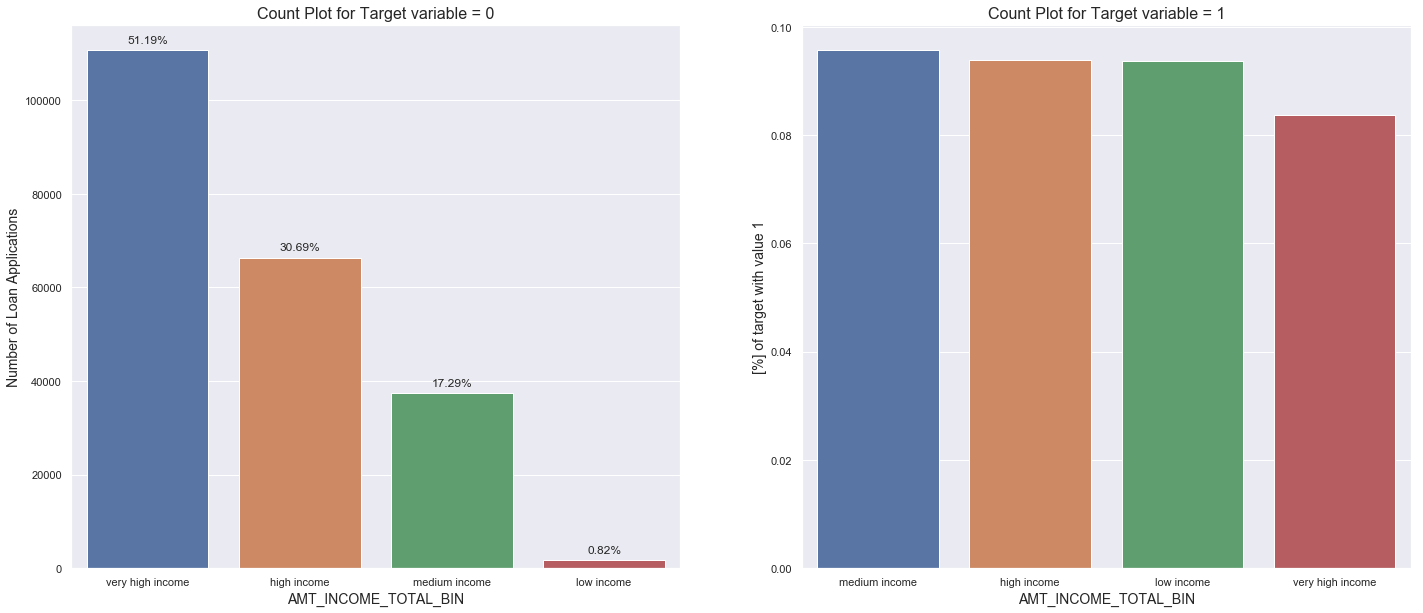

In [56]:
univariate('AMT_INCOME_TOTAL_BIN', 0)

### <a id='5-1'>7.3.14 Distribution of AMT_INCOME_TOTAL</a>

**Observation: Income of Most Applicants lies between 0.1M to 0.25M in both groups.**

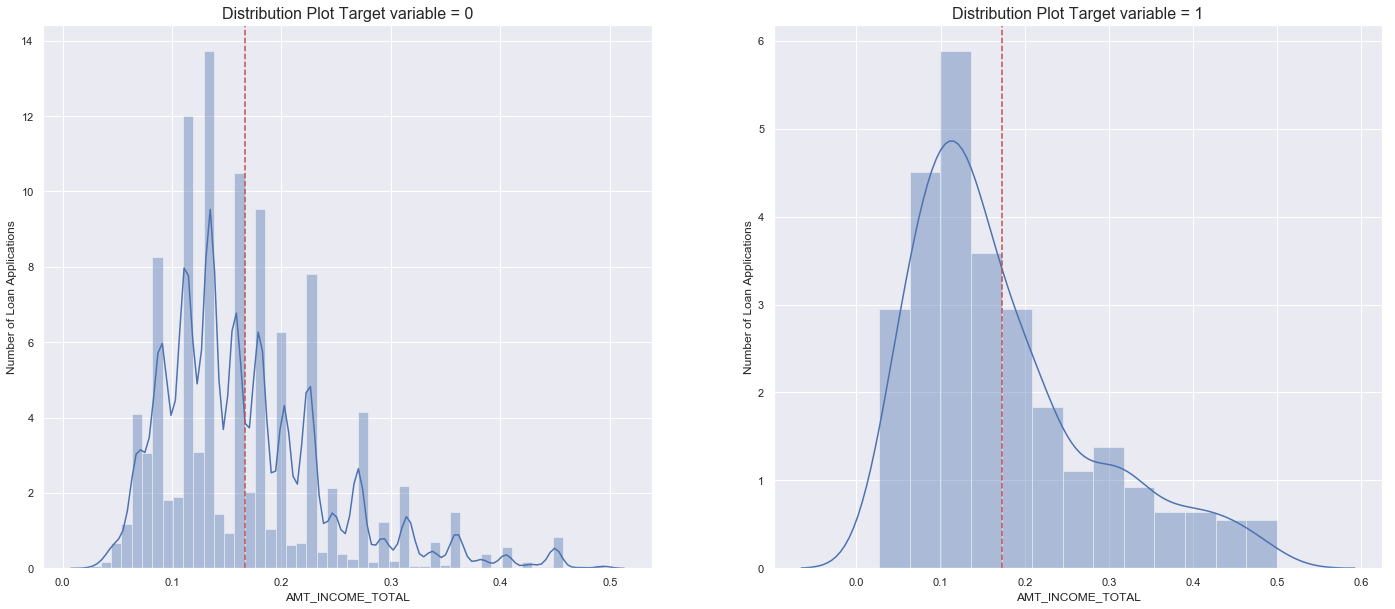

In [57]:
univariate('AMT_INCOME_TOTAL', 1)

### <a id='5-1'>7.3.15 Distribution of AMT_CREDIT</a>

**Observation: Most Applicants have applied for Loan Amount lies between 200000 to 1000000 in both groups.**

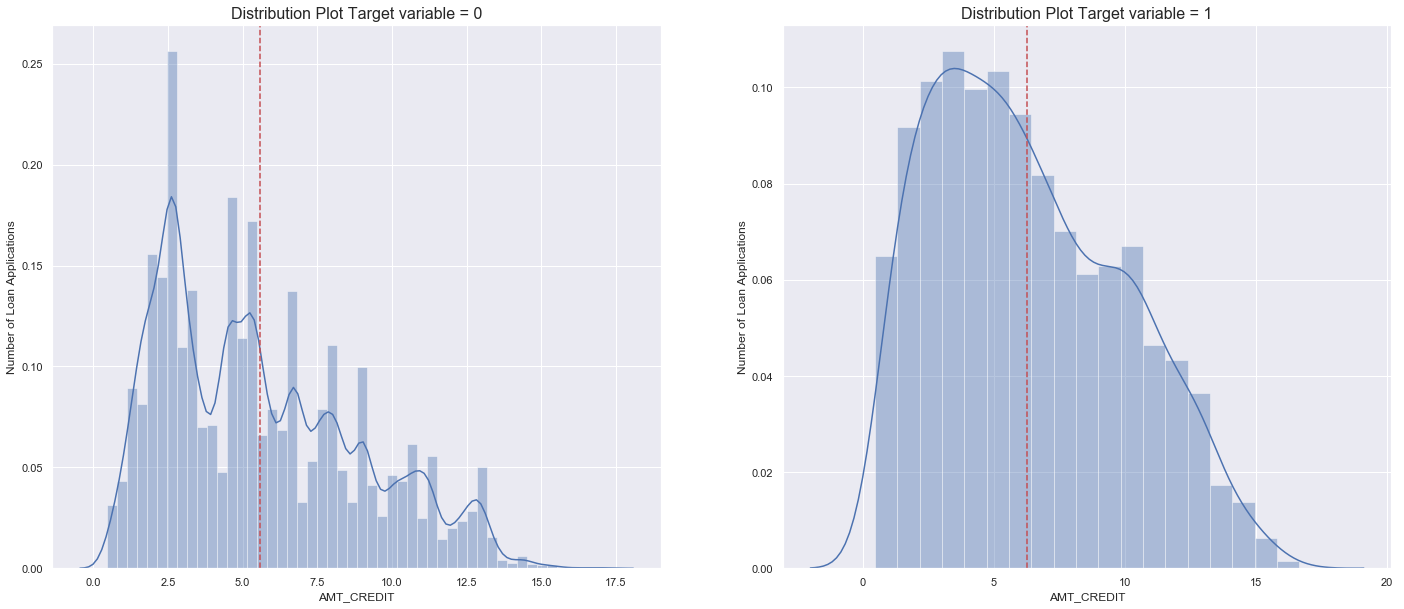

In [58]:
univariate('AMT_CREDIT', 1)

### <a id='5-1'>7.3.16 Distribution of AMT_GOODS_PRICE</a>

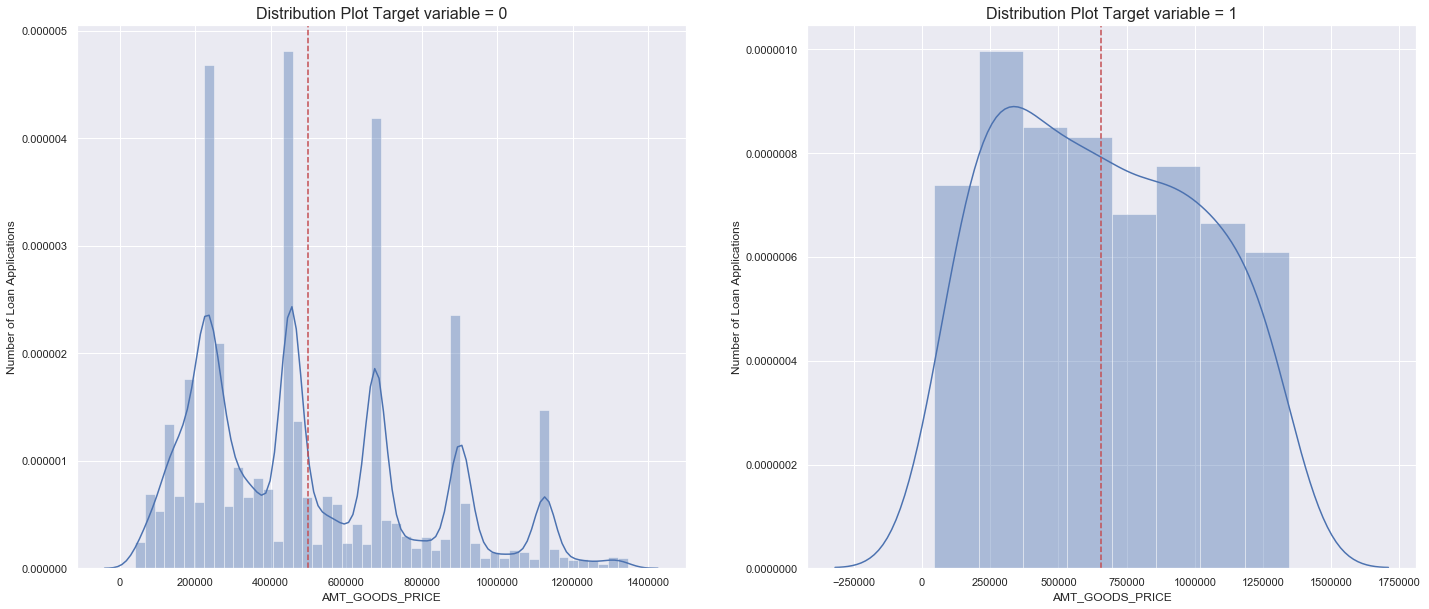

In [59]:
univariate('AMT_GOODS_PRICE', 1)

### <a id='5-1'>7.3.17 Distribution of APPLICANT_AGE</a>

**Observations: Age of most of the applicants lies between 25 years to 52 years**

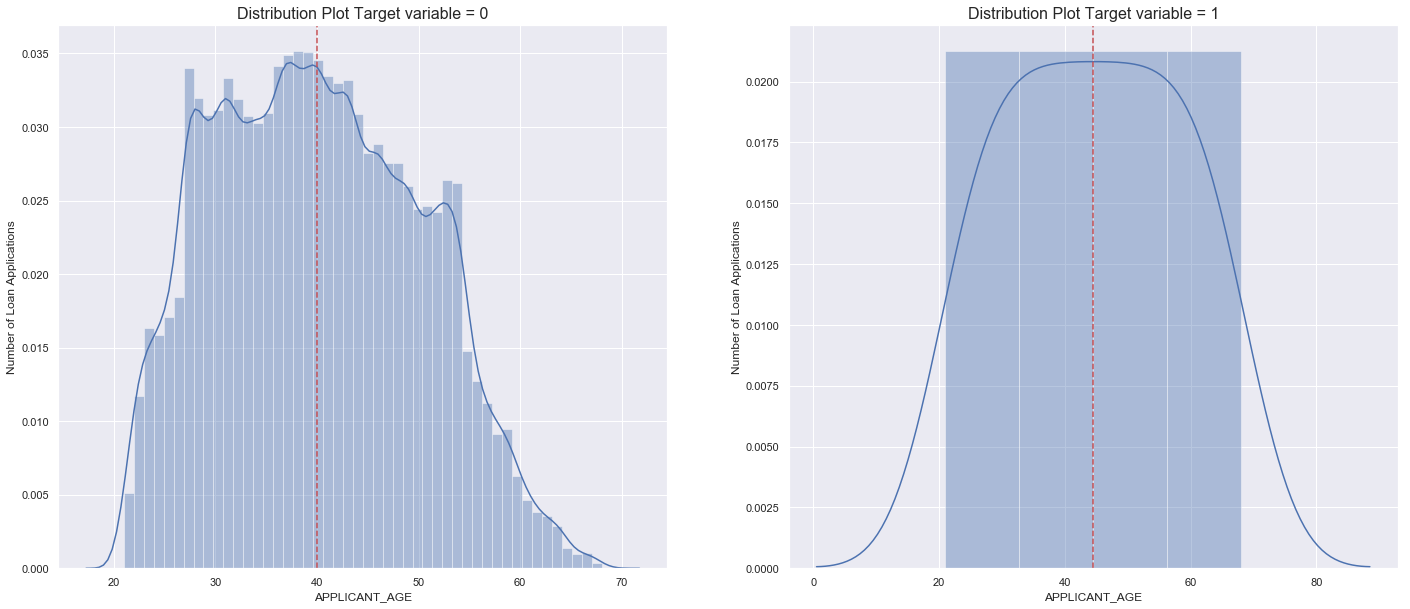

In [61]:
univariate('APPLICANT_AGE', 1)

### <a id='5-1'>7.3.18 Distribution of APPLICANT_EXP</a>

**Observations: Experience of most of the applicants lies between 0 years to 8 years**

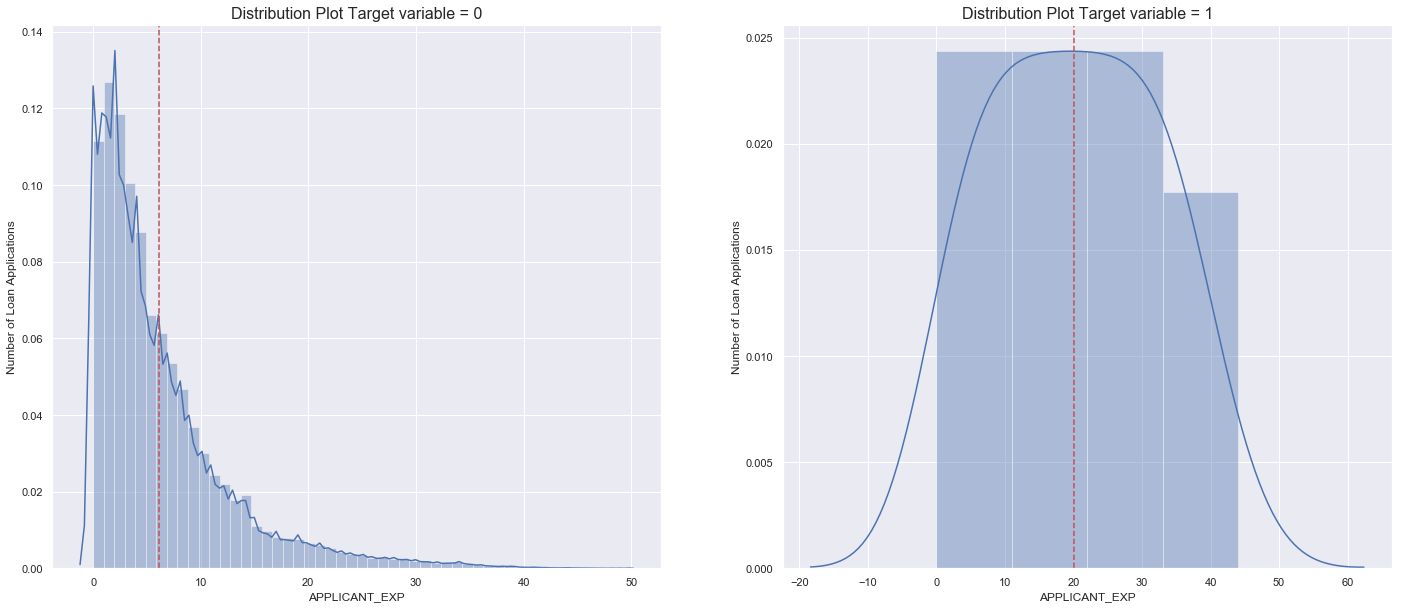

In [63]:
univariate('APPLICANT_EXP', 1)

## <a id='5-1'>7.4 Segmented Univariate Analysis</a>

In [64]:
def segmented(col, label_rotation = False):
    '''
    Segmented univariate function will plot the graphs based on below parameters.  
    col               : Name of the Column
    label_rotation    : Default value is False
    '''
    
    df1 = target_0_df.copy()
    df2 = target_1_df.copy()
    df1['AMT_CREDIT'] = df1['AMT_CREDIT']*100000
    df2['AMT_CREDIT'] = df2['AMT_CREDIT']*100000
    grp_df1 = df1.groupby(by = col).AMT_CREDIT.sum()
    grp_df2 = df2.groupby(by = col).AMT_CREDIT.sum()
    
    fig, ax = plt.subplots(nrows =1,ncols=2,figsize=(24,10))
    sns.set(style="darkgrid")
       
    ax[0].set_title('Segmented Univariate Analysis when Target = 0', fontsize = 16)
    ax0 = sns.barplot(x = grp_df1.index, y = grp_df1.values, ax = ax[0])
    ax0.set_xlabel(col, fontsize = 14)
    ax0.set_ylabel('Sum of Loan Amount', fontsize = 14)
    ax0.set_yscale('log', basey = 10)
        
    if(label_rotation):
        ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90, fontsize = 14)
        
    total1 = len(df1)
    for p in ax0.patches:
        percentage = '{:}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax0.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10),
                         textcoords = 'offset points')
            
    ax[1].set_title('Segmented Univariate Analysis when Target = 1', fontsize = 16)
    ax1 = sns.barplot(x = grp_df2.index, y = grp_df2.values, ax = ax[1])
    ax1.set_xlabel(col, fontsize = 14)
    ax1.set_ylabel('Sum of Loan Amount', fontsize = 14)
    ax1.set_yscale('log', basey = 10)
       
    if(label_rotation):
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize = 14)
               
    total2 = len(df2)
    for p in ax1.patches:
        percentage = '{:}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax1.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10),
                         textcoords = 'offset points')
                    
    plt.show()

### <a id='5-1'>7.4.1 Analysis of CODE_GENDER</a>

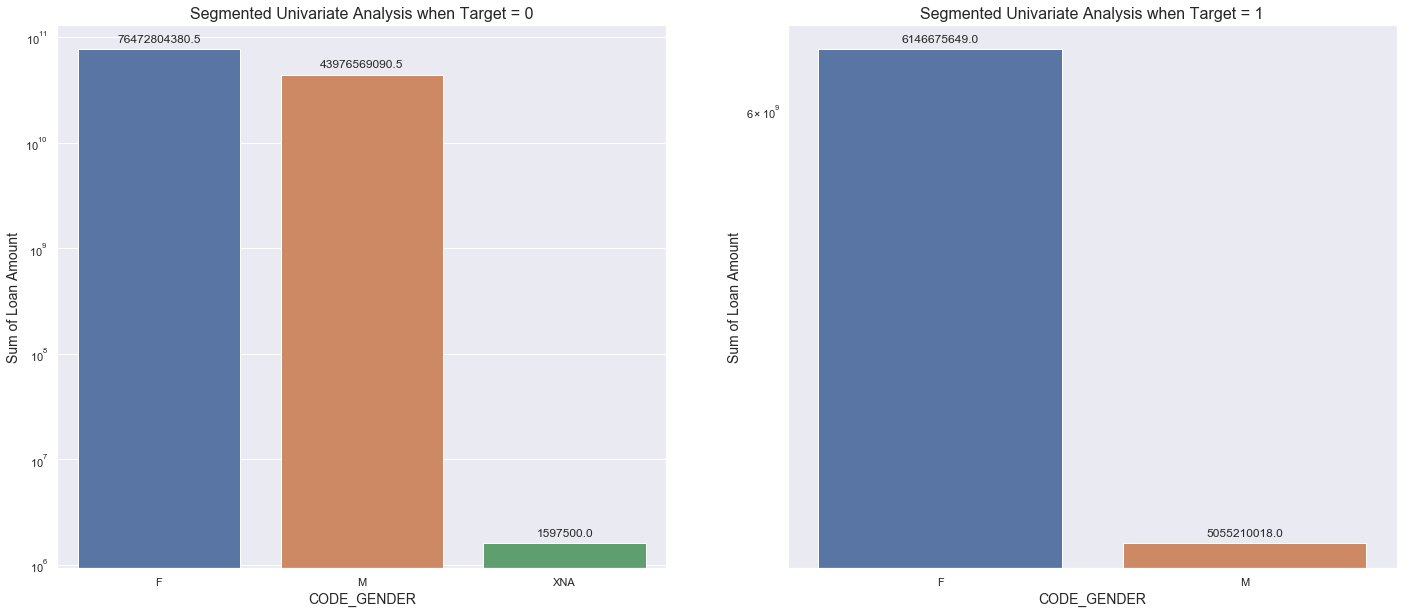

In [65]:
segmented('CODE_GENDER')

### <a id='5-1'>7.4.2 Analysis of NAME_EDUCATION_TYPE</a>

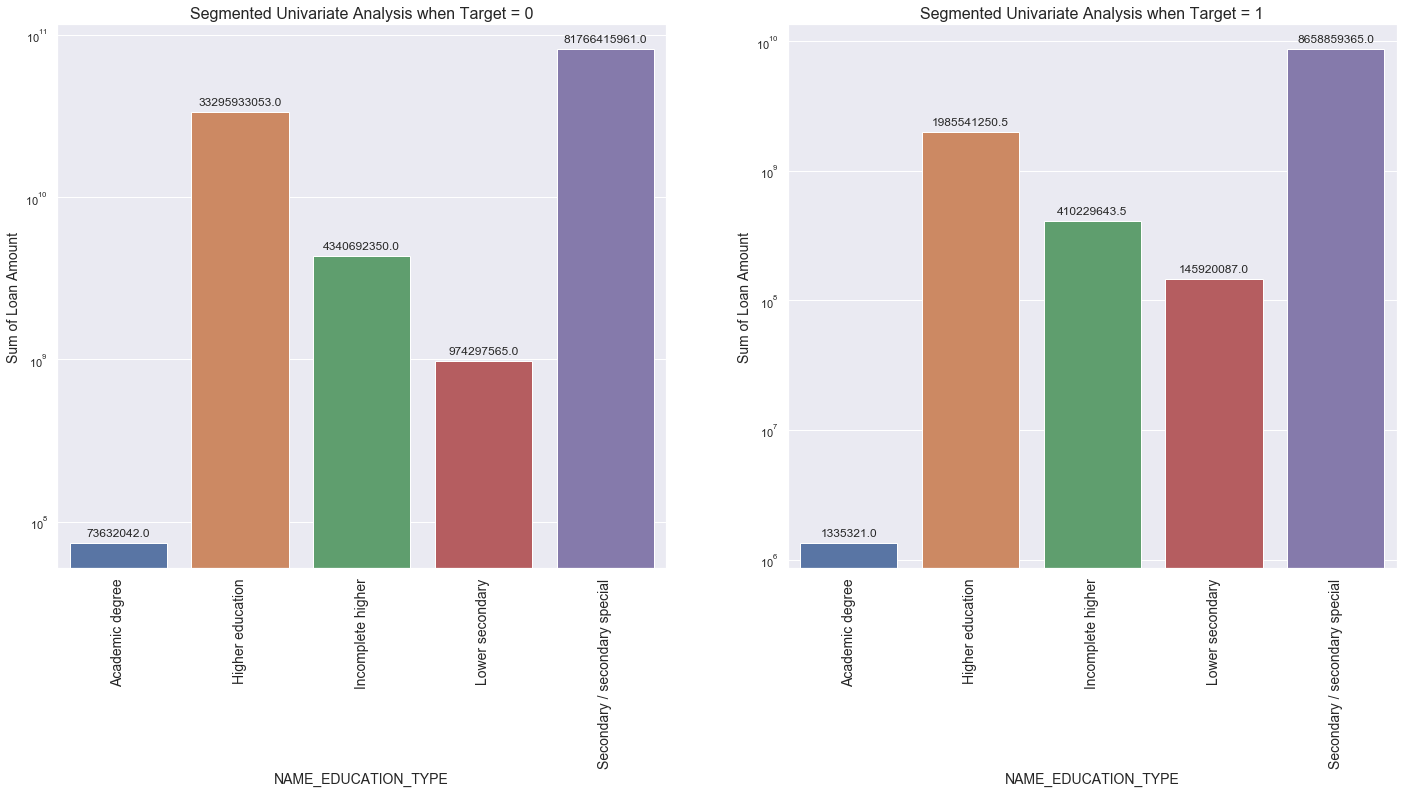

In [66]:
segmented('NAME_EDUCATION_TYPE', label_rotation = True)

### <a id='5-1'>7.4.3 Analysis of NAME_INCOME_TYPE</a>

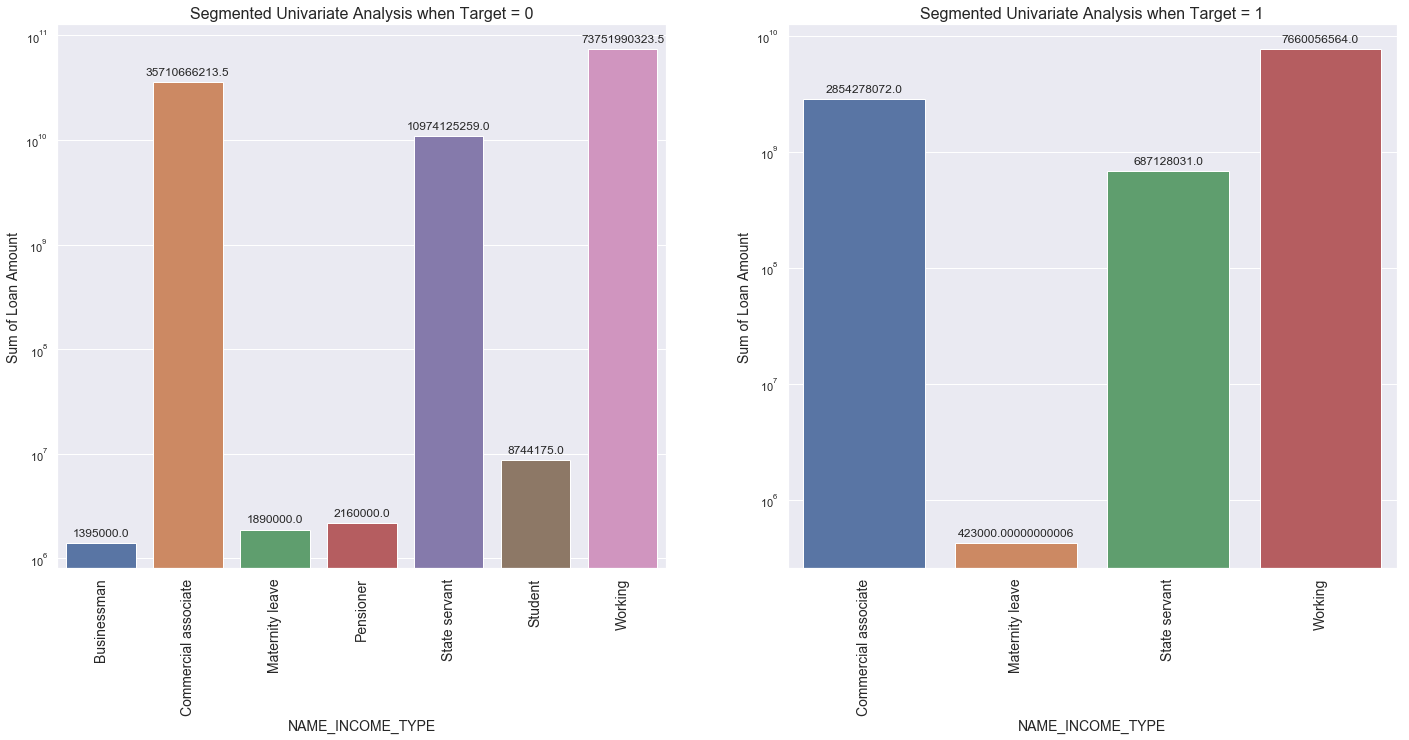

In [67]:
segmented('NAME_INCOME_TYPE', label_rotation = True)

### <a id='5-1'>7.4.4 Analysis of NAME_FAMILY_STATUS</a>

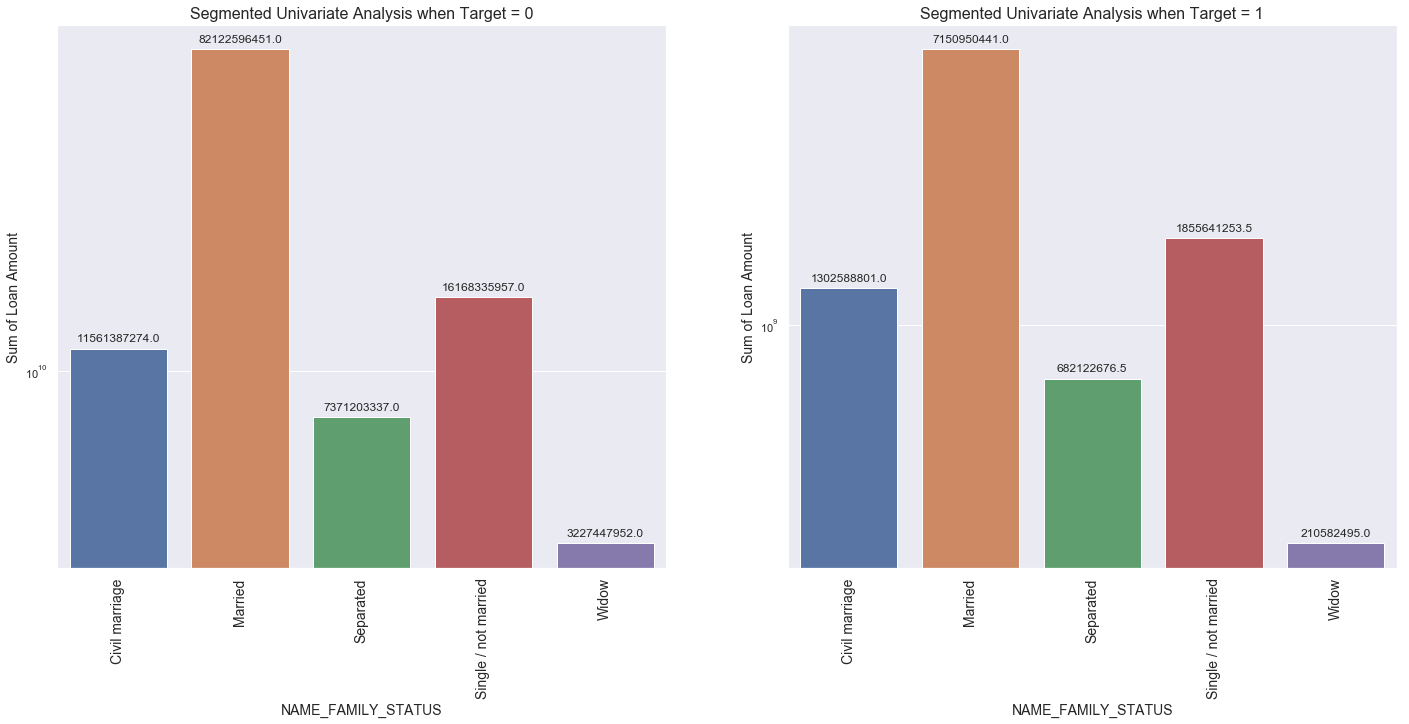

In [70]:
segmented('NAME_FAMILY_STATUS', label_rotation = True)

### <a id='5-1'>7.4.5 Analysis of CNT_CHILDREN</a>

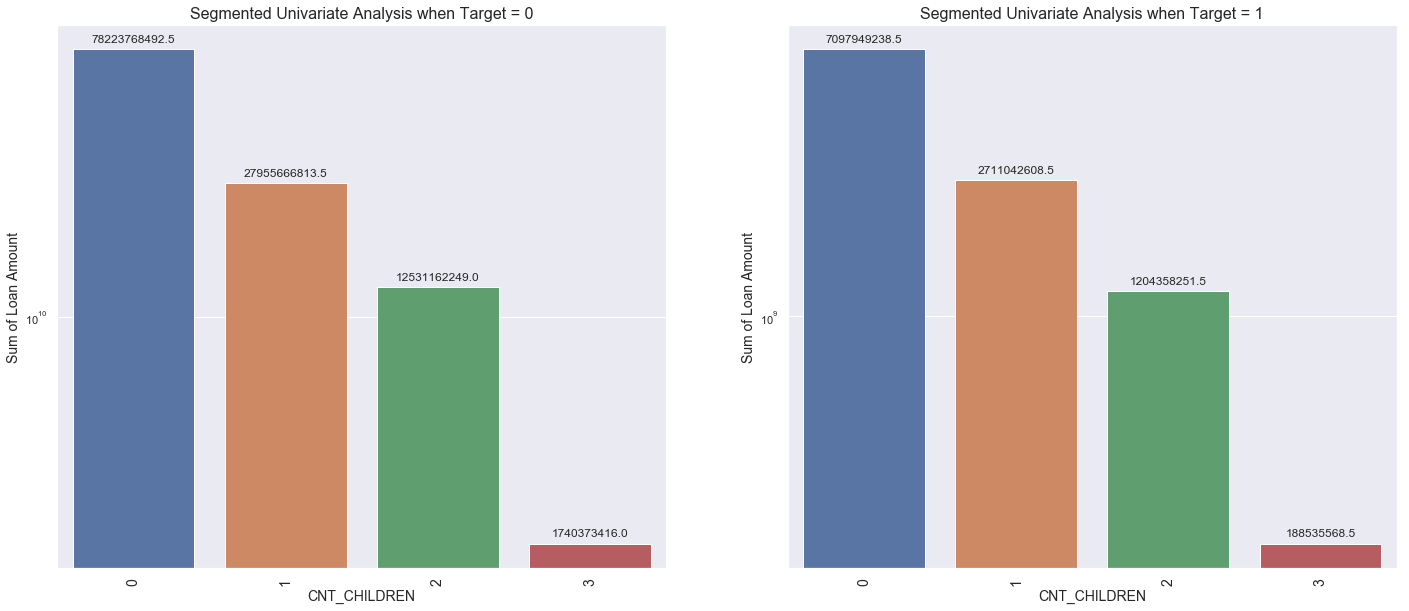

In [71]:
segmented('CNT_CHILDREN', label_rotation = True)

### <a id='5-1'>7.4.6 Analysis of APPLICANT_AGE_BIN</a>

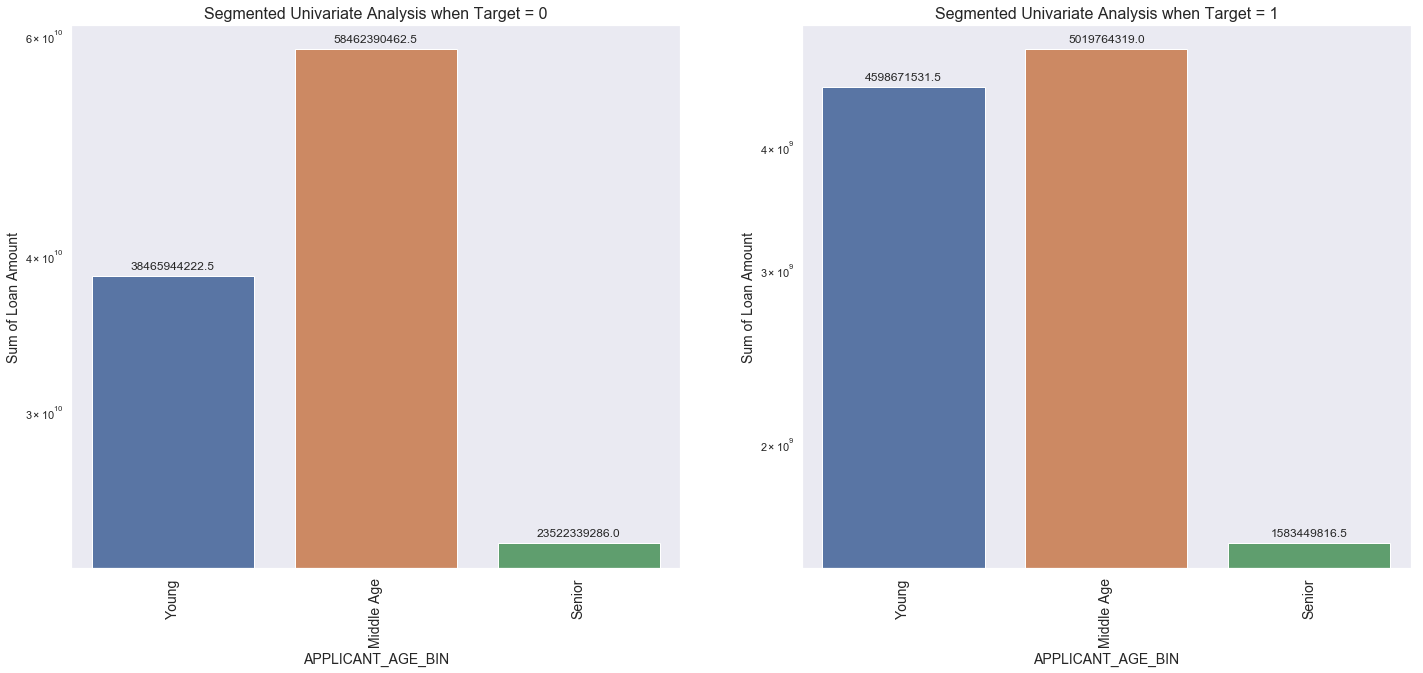

In [72]:
segmented('APPLICANT_AGE_BIN', label_rotation = True)

## <a id='5-1'>7.5 Bivariate Analysis</a>

In [73]:
def bivariate(col, hue, df1 = target_0_df, df2 = target_1_df, label_rotation = False):
    '''
    Univariate function will plot the graphs based on below parameters.  
    col               : Name of the Column
    hue               : hue
    df1               : Name of the dataframe (default to target_0_df)
    df2               : Name of the dataframe (default to target_1_df)
    label_rotation    : Default value is False
    '''
    
    fig, ax = plt.subplots(nrows =1,ncols=2,figsize=(24,10))
    sns.set(style="darkgrid")
        
    ax[0].set_title('Distribution of Contract type by gender 0', fontsize = 16)
    ax0 = sns.countplot(data = df1, x = col, hue = hue, ax = ax[0])
    ax0.set_xlabel(col, fontsize = 14)
    ax0.set_ylabel('Number of Loan Applications', fontsize = 14)
        
    if(label_rotation):
        ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90, fontsize = 14)
        
    total1 = len(df1)
    for p in ax0.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax0.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10),
                         textcoords = 'offset points')
            
    ax[1].set_title('Distribution of Contract type by gender 1', fontsize = 16)
    ax1 = sns.countplot(data = df2, x = col, hue = hue, ax = ax[1])
    ax1.set_xlabel(col, fontsize = 14)
    ax1.set_ylabel('Number of Loan Applications', fontsize = 14)
       
    if(label_rotation):
        ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize = 14)
               
    total2 = len(df2)
    for p in ax1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total2)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax1.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 10),
                         textcoords = 'offset points')
    #else:
     #   exit
                
    plt.show()

### <a id='5-1'>7.5.1 Distribution of Loan type by Gender</a>

**Observations: For both types of loan Females have more tendency to default as compated to Male applicants**

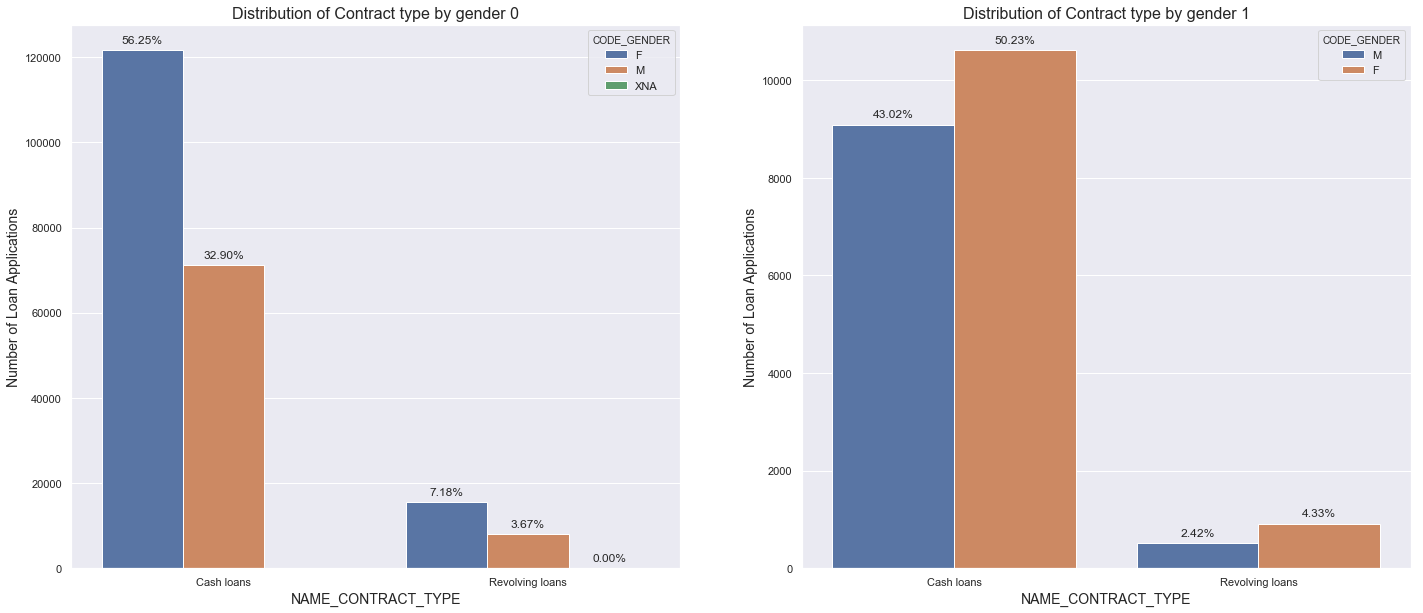

In [74]:
bivariate('NAME_CONTRACT_TYPE', hue="CODE_GENDER")

### <a id='5-1'>7.5.2 Distribution of client owning a car and by gender</a>

**Observations: This is a very interesting insight, that Females who don't own a car have a high very tendency to Default as compared to Females who owns a car (44% to 11%). This observation can also be seen in Males but the extent is small (24% to 21%)**

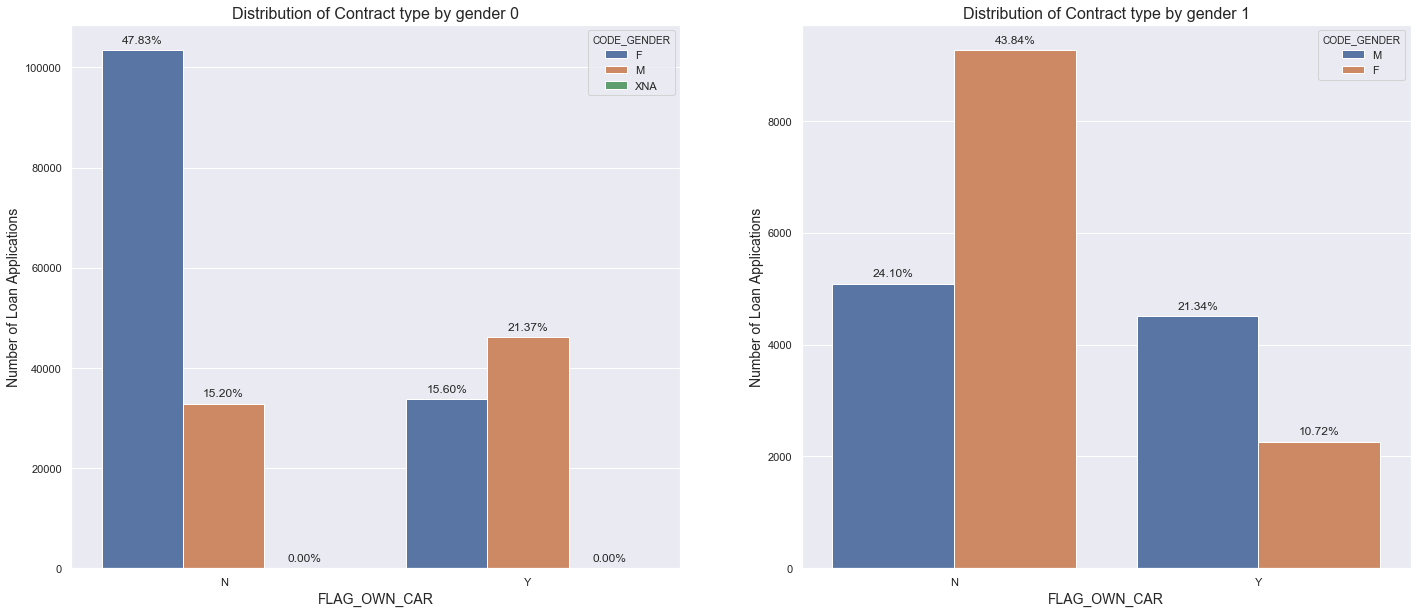

In [75]:
bivariate('FLAG_OWN_CAR', hue="CODE_GENDER")

### <a id='5-1'>7.5.3 Distribution of Client Owning a House/Flat and by Gender</a>

**Observations: Females who own a house or flat have more tendency to default as compared to Males who owns a house or flat.**

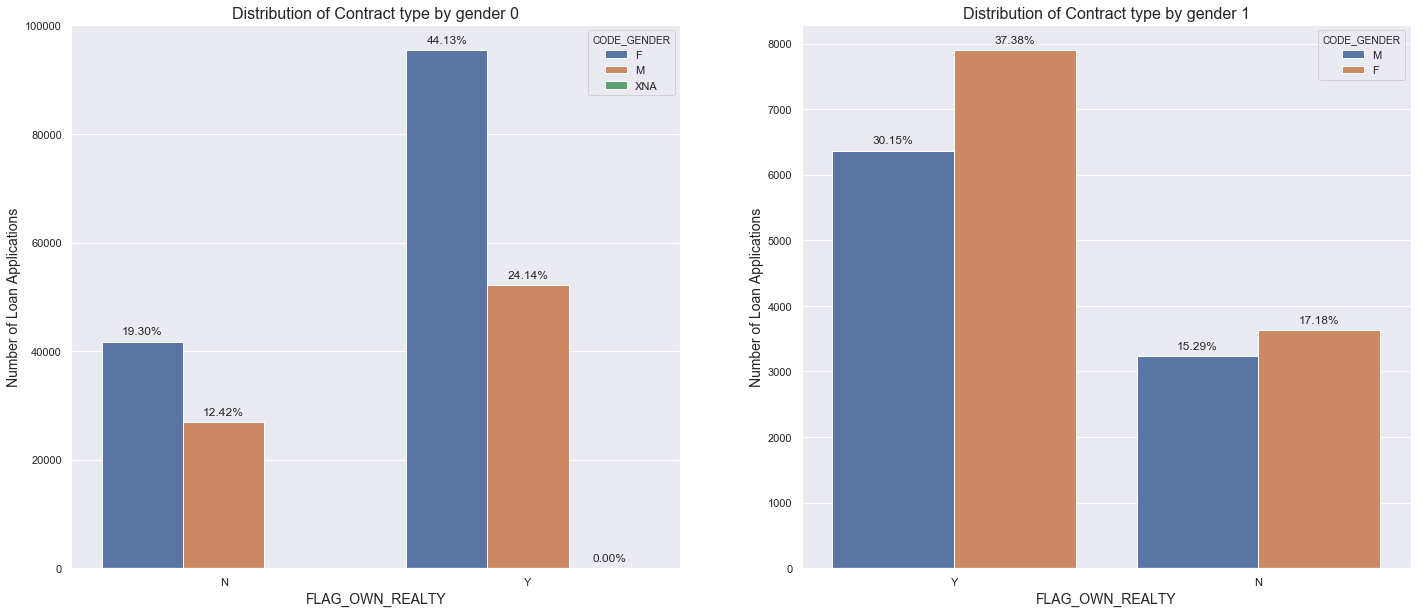

In [76]:
bivariate('FLAG_OWN_REALTY', hue="CODE_GENDER")

### <a id='5-1'>7.5.4 [Income Type] vs [Loan Amount] vs [Income category] for Target = 0</a>

**Observations: As the Income of 'State servant', 'Working', 'Commercial associate' and 'Pensioner' increase, the loan amount also increases. However, for 'Maternity leave' and 'Student' as the income increases, the loan amount decreases.
Also, 'State servant' and 'Commercial associate' in very high income bracket get more loan amount as compared to 'Business man'.**

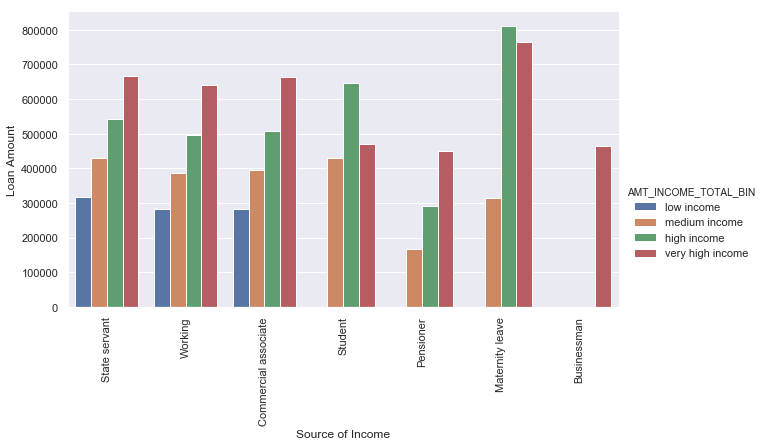

In [77]:
df1 = target_0_df.copy()
df1['AMT_CREDIT'] = df1['AMT_CREDIT']*100000

sns.set(style="darkgrid")
s1 = sns.catplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue = 'AMT_INCOME_TOTAL_BIN', 
                 kind='bar', data = df1, ci=None, aspect=1.8)
s1.set_axis_labels('Source of Income','Loan Amount')
s1.set_xticklabels(rotation = 90)
s1.set_titles("[Income Type] vs [Loan Amount] vs [Income category]")
#s1.despine(left=True)
plt.show()

### <a id='5-1'>7.5.5 [Income Type] vs [Loan Amount] vs [Income category] for Target = 1</a>

**Observations: Female Applicants who are on Maternity Leaves and are with Medium Income are having more issues in with the repayment of Loans as compared to applicants of other income type.**

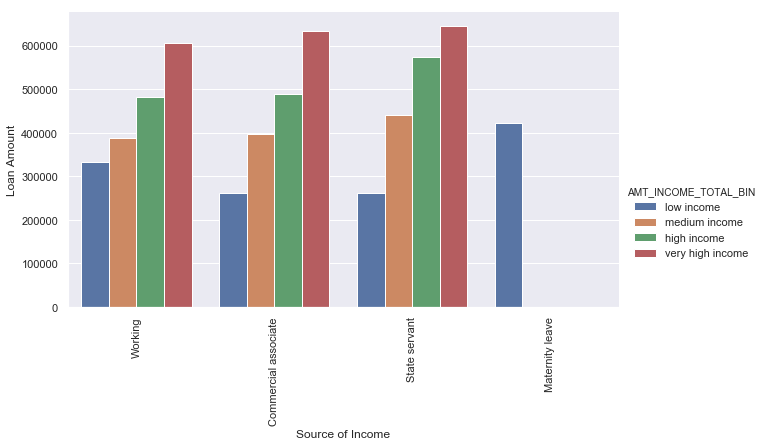

In [78]:
df2 = target_1_df.copy()
df2['AMT_CREDIT'] = df2['AMT_CREDIT']*100000

sns.set(style="darkgrid")
s1 = sns.catplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue = 'AMT_INCOME_TOTAL_BIN', 
                 kind='bar', data = df2, ci=None, aspect=1.8)
s1.set_axis_labels('Source of Income','Loan Amount')
s1.set_xticklabels(rotation = 90)
s1.set_titles("[Income Type] vs [Loan Amount] vs [Income category]")
#s1.despine(left=True)
plt.show()

### <a id='5-1'>7.5.6 Pair Plots for Target = 0</a>

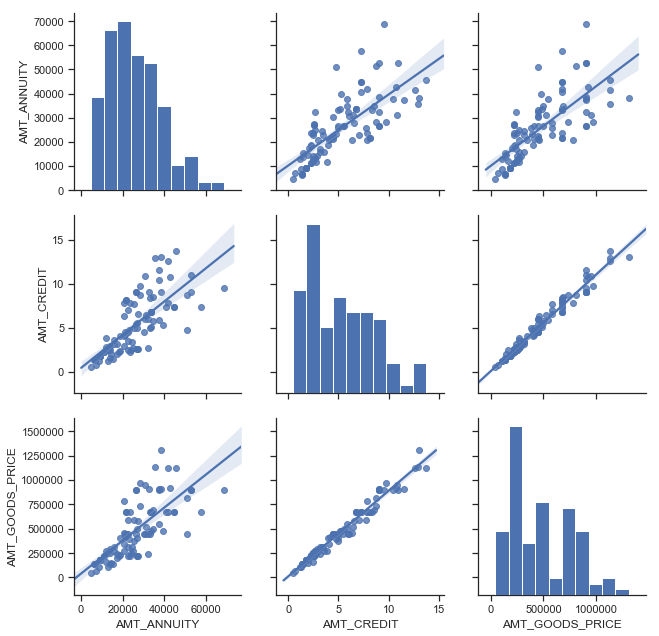

In [79]:
sns.set(style='ticks')
sns.pairplot(data = target_0_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']].sample(100), kind='reg', height = 3)
plt.show()

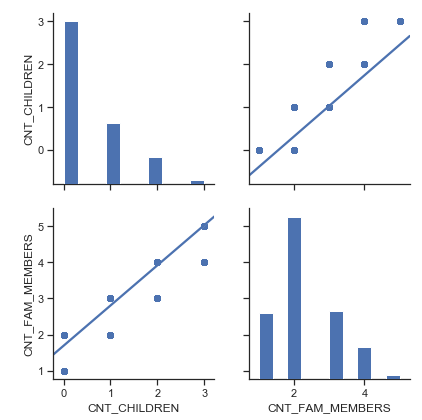

In [80]:
sns.set(style='ticks')
sns.pairplot(data = target_0_df[['CNT_CHILDREN','CNT_FAM_MEMBERS']], kind='reg', height = 3)
plt.show()

### <a id='5-1'>7.5.7 Pair Plots for Target = 1</a>

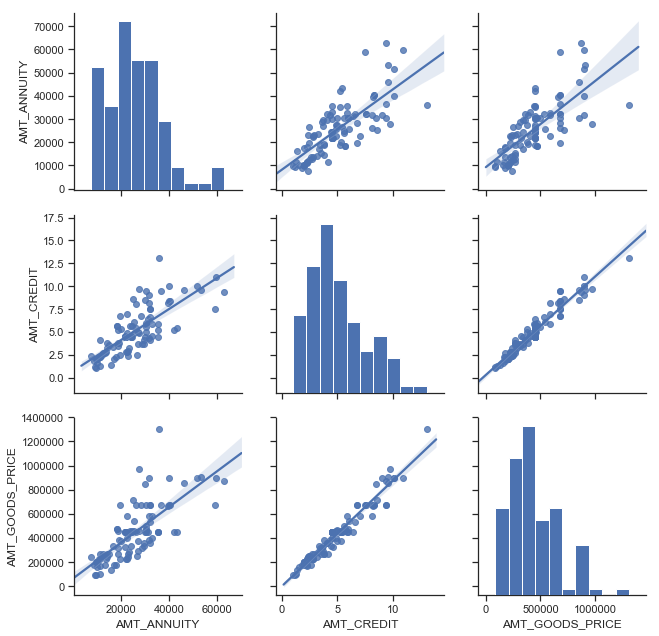

In [81]:
sns.set(style='ticks')
df1 = target_1_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']]
sns.pairplot(data = target_1_df[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']].sample(100), kind='reg', height = 3)
plt.show()

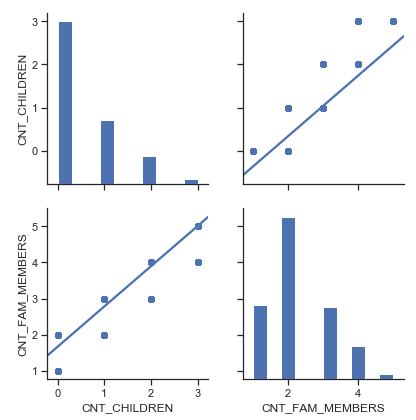

In [82]:
sns.set(style='ticks')
sns.pairplot(data = target_1_df[['CNT_CHILDREN','CNT_FAM_MEMBERS']], kind='reg', height = 3)
plt.show()

### <a id='5-1'>7.5.8 Finding Correlation between Numerical variables for Target = 0</a>

#### <a id='5-1'> Observation: For the group who has No issues with the repayment of the loans, we can observe that there are some key variables which are highly correlated as mentioned below:
#### <a id='5-1'> CNT_CHILDREN - CNT_FAM_MEMBERS (0.89)
#### <a id='5-1'> AMT_CREDIT - AMT_ANNUITY(0.77)
#### <a id='5-1'> AMT_CREDIT - AMT_GOODS_PRICE(0.99)
#### <a id='5-1'> AMT_GOODS_PRICE - AMT_ANNUITY(0.77)

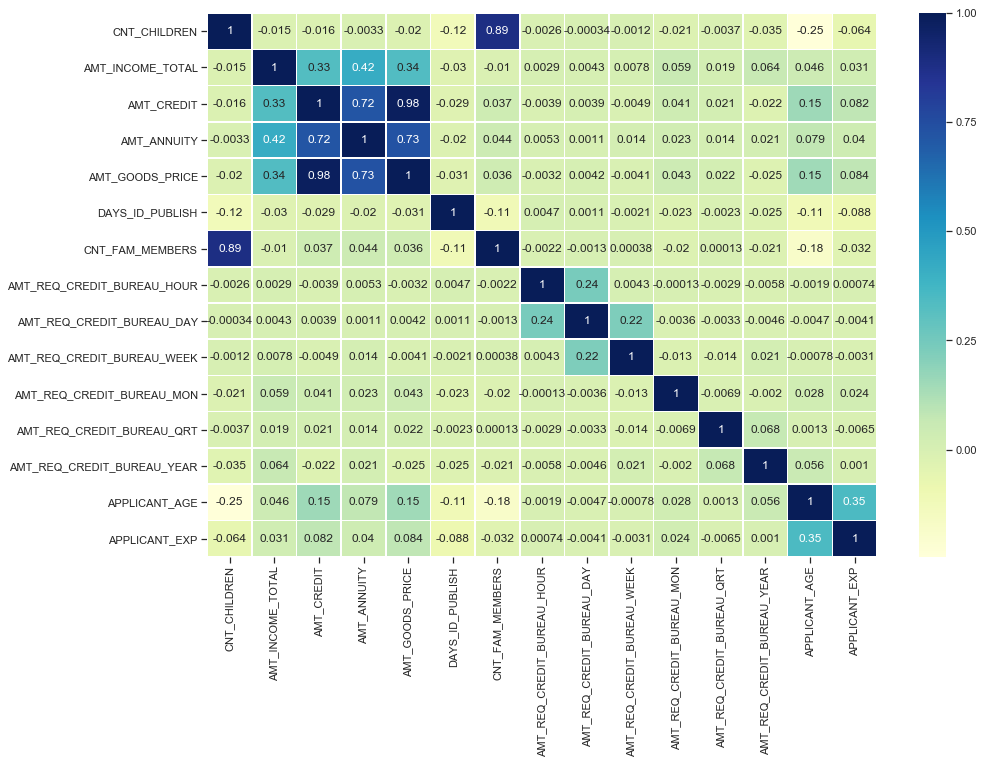

In [83]:
correlation_df0 = target_0_df.loc[:,['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                    'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
                                    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                                    'APPLICANT_AGE', 'APPLICANT_EXP']]
plt.figure(figsize=(15,10))
corr0 = correlation_df0.corr()
sns.heatmap(corr0, xticklabels = corr0.columns.values, yticklabels = corr0.columns.values, linewidths = .5,
            cmap = 'YlGnBu', annot = True)

### <a id='5-1'>7.5.9 Finding Correlation between Numerical variables for Target = 1</a>

#### <a id='5-1'> Observation: For the group who has issues with the repayment of the loans, we can observe that there are some key variables which are highly correlated as mentioned below:
#### <a id='5-1'> CNT_CHILDREN - CNT_FAM_MEMBERS (0.89)
#### <a id='5-1'> AMT_CREDIT - AMT_ANNUITY(0.75)
#### <a id='5-1'> AMT_CREDIT - AMT_GOODS_PRICE(0.98)
#### <a id='5-1'> AMT_GOODS_PRICE - AMT_ANNUITY(0.75)

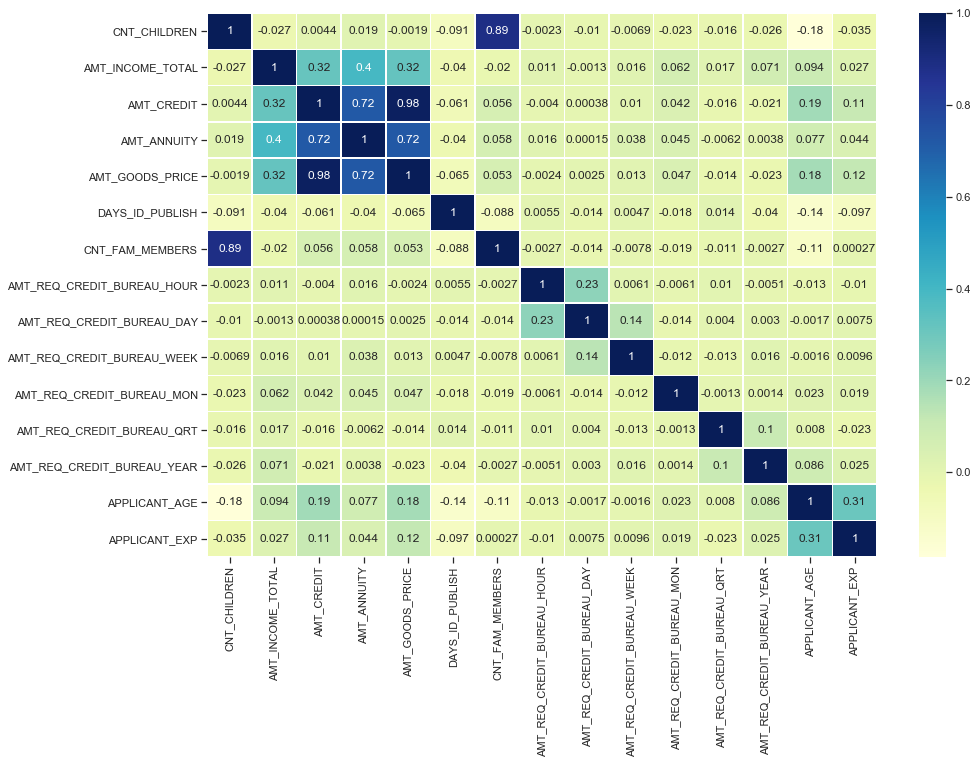

In [84]:
correlation_df1 = target_1_df.loc[:,['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                                    'AMT_GOODS_PRICE', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
                                    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                                    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                                    'APPLICANT_AGE', 'APPLICANT_EXP']]
plt.figure(figsize=(15,10))
corr1 = correlation_df1.corr()
sns.heatmap(corr1, xticklabels = corr1.columns.values, yticklabels = corr1.columns.values, linewidths = .5,
            cmap = 'YlGnBu', annot = True)

# End of Analysis for Application Dataset